In [1]:
 #pip install ggplot

In [2]:
#pip install missingno

### Importing the Libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from dtreeviz.trees import dtreeviz
import graphviz
from sklearn import metrics
from dtreeviz import dtreeviz

import random
random.seed(123)

In [4]:
# Load Datasets
student_info_df = pd.read_csv('studentInfo.csv')
courses_df = pd.read_csv('courses.csv')
assessment_df = pd.read_csv('assessments.csv')
vle_df = pd.read_csv('vle.csv')
studentRegistration_df = pd.read_csv('studentRegistration.csv')
studentAssessment_df = pd.read_csv('studentAssessment.csv')

### student_info dataset

In [5]:
len(student_info_df)

32593

Student_Info dataset consists of 32593 rows.

In [6]:
student_info_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [7]:
#Number of Unique values in final results
print("Unique Values in final result: " , student_info_df['final_result'].unique())

Unique Values in final result:  ['Pass' 'Withdrawn' 'Fail' 'Distinction']


In [8]:
# studentVle_df = pd.read_csv('studentVle.csv')
# studentVle_df = studentVle_df.iloc[:10000,:]

In [9]:
vle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


vle_df (Virtual Learning Environment dataset) consists of 6 columns namely id_site,code_module,code_presentation,activity_type,week_from and week_to

### Checking for the NULL Values in vle_df

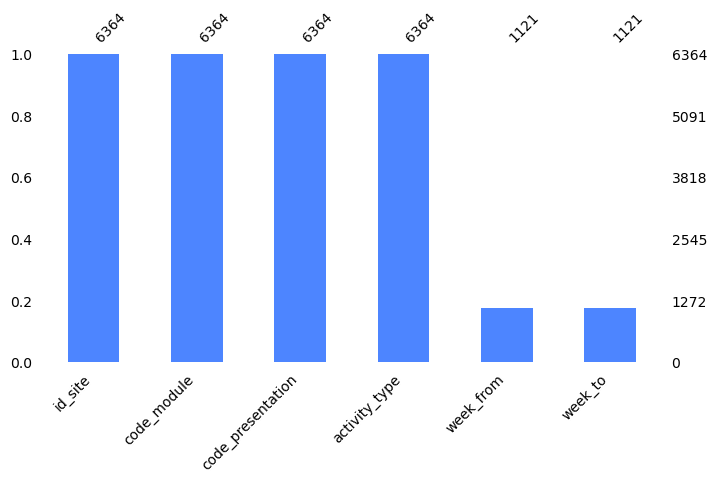

In [10]:

missingno.bar(vle_df, figsize=(8,4), fontsize=10,  color=(0.3, 0.52, 1.0))
plt.show()

Here We are checking for the NULL values among all the columns. It is observed that there are only 1121 rows in the columns week_from and week_to

In [11]:
vle_df.head(5)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


### Drop the Unnecessary Columns in vle_df

In [12]:
vle_df.drop(columns=['week_from','week_to'],inplace=True)

In [13]:
vle_df.head(5)

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


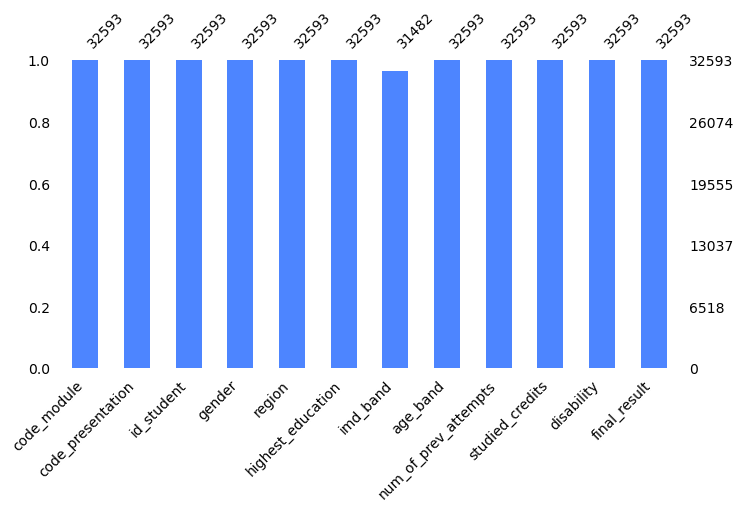

In [14]:
missingno.bar(student_info_df, figsize=(8,4), fontsize=10,  color=(0.3, 0.52, 1.0))
plt.show()

In [15]:

for input in [courses_df, assessment_df, vle_df, student_info_df, studentRegistration_df]: #, studentVle_df]:
    input["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), input.code_module, input.code_presentation))


Adding a new column called "module_presentation" to all the dataframes which is the concatenation of the columns code_module and module_presentation

In [16]:
courses_df.head()

,code_module,code_presentation,module_presentation_length,module_presentation
0,AAA,2013J,268,AAA_2013J
1,AAA,2014J,269,AAA_2014J
2,BBB,2013J,268,BBB_2013J
3,BBB,2014J,262,BBB_2014J
4,BBB,2013B,240,BBB_2013B


Checking for the size

In [17]:
print(" In Student Information table, We have \n  Total Number of rows : {}  \n  Count of unique student Ids = {}  \n \
It's clear that the student id is repeating because there are students who enrolled for multiple courses." .format(len(student_info_df),len(student_info_df.id_student.unique())))
print("\n This also means that student ID is not really a unique identifier of the table.\n")

 In Student Information table, We have 
  Total Number of rows : 32593  
  Count of unique student Ids = 28785  
 It's clear that the student id is repeating because there are students who enrolled for multiple courses.

 This also means that student ID is not really a unique identifier of the table.



In [18]:
studentRegistration_df

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation
0,AAA,2013J,11391,-159.0,NaN,AAA_2013J
1,AAA,2013J,28400,-53.0,NaN,AAA_2013J
2,AAA,2013J,30268,-92.0,12.0,AAA_2013J
3,AAA,2013J,31604,-52.0,NaN,AAA_2013J
4,AAA,2013J,32885,-176.0,NaN,AAA_2013J
...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,GGG_2014J
32589,GGG,2014J,2645731,-23.0,NaN,GGG_2014J
32590,GGG,2014J,2648187,-129.0,NaN,GGG_2014J
32591,GGG,2014J,2679821,-49.0,101.0,GGG_2014J


In [19]:
studentRegistration_df['date_registration'].unique()

array([-159.,  -53.,  -92.,  -52., -176., -110.,  -67.,  -29.,  -33.,
       -179., -103.,  -47.,  -59.,  -68., -180.,  -95., -130.,  -50.,
       -107.,  -27.,  -31., -170.,  -62., -100., -109.,    5.,  -43.,
        -26.,  -32.,  -99.,  -82., -197.,  -75.,  -96., -195.,  -61.,
        -37.,  -36., -132., -138., -174.,  -44.,  -16.,  -54.,  -64.,
        -46., -117.,  -45., -162.,  -57.,  -39., -128.,  -74.,  -12.,
       -136.,  -73.,  -51., -169., -172., -108., -165.,  -58.,  -79.,
          2., -151., -198., -186., -145., -191.,  -17.,   -8., -141.,
        -80., -115.,  -83.,  -18.,  -66., -123., -121., -192., -196.,
         48.,  -71.,  -81.,  -60.,  -49.,  -38., -129.,   -4.,  -19.,
        -87., -155., -185.,  -23.,  -15., -120., -156., -127.,  -30.,
       -158.,  -22.,  -91.,  -42., -144.,  -63.,  -35.,   20., -102.,
       -124., -106., -164., -137.,  -65., -148., -113., -116.,  -28.,
        -85.,  -56., -101.,  -24.,  -94.,  -11., -105., -153.,  -48.,
        -25.,  -72.,

In [20]:
studentRegistration_df['date_unregistration'].unique()

array([  nan,   12.,   96.,   72.,  175.,  135.,   30.,  144.,  129.,
         58.,  158.,  191.,  123.,   60.,  185.,  166.,  109.,  170.,
        187.,  177., -121.,   -3.,   53.,   65.,  160.,   51.,    5.,
        202., -100.,  172.,  119.,   73.,  128.,  241.,   23.,  173.,
        203.,   27.,   37.,  103.,   -2.,  240.,  138.,  163.,   10.,
        178.,  -19.,  -50.,  -80.,  242.,  220.,  114.,  219.,   13.,
        199.,   93.,   39.,  164.,  235.,  207.,  143.,   24.,  234.,
        104.,  201.,   67.,  -87.,  229.,  132., -101.,  -47.,  165.,
        227.,   18.,  174., -137.,  -12.,   80.,  -22.,  150.,  -11.,
       -129.,    9.,  228.,  180.,  182.,  213.,   63.,   32.,  108.,
        110.,   34.,   55.,  146.,  -16.,  -54.,   38.,  226.,   -8.,
        153.,  139.,   59.,   86.,  -75.,   42.,   -4.,  -59., -225.,
        157.,   68.,   11.,   76.,   33.,   25.,    6.,  -68.,   -9.,
        -65.,  -25.,  -92.,   -1.,   -5.,  208.,   95.,   48.,  -82.,
        198.,   22.,

In [21]:
studentRegistration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
 5   module_presentation  32593 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ MB


In [22]:
len(studentRegistration_df)

32593

In [23]:
studentRegistration_df.date_unregistration.notna().sum() #isna() vs notna()

10072

In [24]:

temporary_df = studentRegistration_df.loc[studentRegistration_df.date_unregistration.notna(),\
                               ['id_student','module_presentation','date_unregistration']]

In [25]:
temporary_df.head(5)


,id_student,module_presentation,date_unregistration
2,30268,AAA_2013J,12.0
15,65002,AAA_2013J,96.0
22,94961,AAA_2013J,72.0
29,106247,AAA_2013J,175.0
41,129955,AAA_2013J,135.0


In [26]:
student_info_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA_2013J
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA_2013J
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA_2013J
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA_2013J


In [27]:
len(temporary_df)

10072

In [28]:
len(student_info_df)

32593

In [29]:

temporary_df =pd.merge(student_info_df, temporary_df, on=['id_student','module_presentation'])

In [30]:
temporary_df.head(5)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,date_unregistration
0,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA_2013J,12.0
1,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,AAA_2013J,96.0
2,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,AAA_2013J,72.0
3,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,AAA_2013J,175.0
4,AAA,2013J,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Withdrawn,AAA_2013J,135.0


In [31]:
len(temporary_df)

10072

In [32]:
temporary_df['final_result'].value_counts()

Withdrawn    10063
Fail             9
Name: final_result, dtype: int64

In [33]:

wrong_results=temporary_df.loc[temporary_df.final_result!='Withdrawn']

In [34]:
wrong_results.head(5)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,date_unregistration
719,BBB,2013J,362907,F,South West Region,Lower Than A Level,20-30%,35-55,2,60,N,Fail,BBB_2013J,0.0
724,BBB,2013J,365288,F,South Region,A Level or Equivalent,70-80%,0-35,0,60,N,Fail,BBB_2013J,0.0
869,BBB,2013J,554243,F,South West Region,Lower Than A Level,60-70%,0-35,0,60,N,Fail,BBB_2013J,166.0
4961,DDD,2013J,315082,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,DDD_2013J,0.0
5010,DDD,2013J,403052,F,Yorkshire Region,HE Qualification,20-30%,0-35,0,150,N,Fail,DDD_2013J,0.0


In [35]:
incorrect_results=wrong_results.index #v.v.imp


In [36]:
incorrect_results

Int64Index([719, 724, 869, 4961, 5010, 5293, 7853, 8001, 8340], dtype='int64')

In [37]:
print(" wrong_results index values: ", incorrect_results)


 wrong_results index values:  Int64Index([719, 724, 869, 4961, 5010, 5293, 7853, 8001, 8340], dtype='int64')


In [38]:
print(" student_info_df before processing: ")
print( student_info_df)

 student_info_df before processing: 
      code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
2             AAA             2013J       30268      F  North Western Region   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
...           ...               ...         ...    ...                   ...   
32588         GGG             2014J     2640965      F                 Wales   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32591         GGG             2014J     2679821      F     South East Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

  

In [39]:
print(" student_info_df before processing value counts: ", student_info_df['final_result'].value_counts())

 student_info_df before processing value counts:  Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64


In [40]:

for i in wrong_results[['id_student','code_module','code_presentation']].values:

    student_info_df.loc[(student_info_df.id_student==i[0])&(student_info_df.code_module==i[1])&\
                 (student_info_df.code_presentation==i[2]),'final_result'] = 'Withdrawn'

In [41]:
print(" student_info_df after processing: ", student_info_df)

 student_info_df after processing:        code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
2             AAA             2013J       30268      F  North Western Region   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
...           ...               ...         ...    ...                   ...   
32588         GGG             2014J     2640965      F                 Wales   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32591         GGG             2014J     2679821      F     South East Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

   

In [42]:
print(" student_info_df after processing value counts: ", student_info_df['final_result'].value_counts())

 student_info_df after processing value counts:  Pass           12361
Withdrawn      10165
Fail            7043
Distinction     3024
Name: final_result, dtype: int64


In [43]:
assessment_df

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation
0,AAA,2013J,1752,TMA,19.0,10.0,AAA_2013J
1,AAA,2013J,1753,TMA,54.0,20.0,AAA_2013J
2,AAA,2013J,1754,TMA,117.0,20.0,AAA_2013J
3,AAA,2013J,1755,TMA,166.0,20.0,AAA_2013J
4,AAA,2013J,1756,TMA,215.0,30.0,AAA_2013J
...,...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0,GGG_2014J
202,GGG,2014J,37435,TMA,61.0,0.0,GGG_2014J
203,GGG,2014J,37436,TMA,124.0,0.0,GGG_2014J
204,GGG,2014J,37437,TMA,173.0,0.0,GGG_2014J


In [44]:
assessment_df.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

In [45]:

assessment_df[assessment_df.code_module.isin(["CCC","GGG"])].groupby(['code_module','code_presentation',"assessment_type"]).agg(type_weights = ('weight',sum))

type_weights
code_module code_presentation assessment_type              
CCC         2014B             CMA                      25.0
                              Exam                    200.0
                              TMA                      75.0
            2014J             CMA                      25.0
                              Exam                    200.0
                              TMA                      75.0
GGG         2013J             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0
            2014B             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0
            2014J             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0

In [46]:
print("assessment_df after group by on 3 columns: ", assessment_df)


assessment_df after group by on 3 columns:      code_module code_presentation  id_assessment assessment_type   date  \
0           AAA             2013J           1752             TMA   19.0   
1           AAA             2013J           1753             TMA   54.0   
2           AAA             2013J           1754             TMA  117.0   
3           AAA             2013J           1755             TMA  166.0   
4           AAA             2013J           1756             TMA  215.0   
..          ...               ...            ...             ...    ...   
201         GGG             2014J          37443             CMA  229.0   
202         GGG             2014J          37435             TMA   61.0   
203         GGG             2014J          37436             TMA  124.0   
204         GGG             2014J          37437             TMA  173.0   
205         GGG             2014J          37444            Exam  229.0   

     weight module_presentation  
0      10.0          

In [47]:
assessment_df.loc[(assessment_df.code_module=='CCC')]['assessment_type'].value_counts()

CMA     8
TMA     8
Exam    4
Name: assessment_type, dtype: int64

In [48]:
assessment_df.loc[(assessment_df.code_module=='CCC'),'weight']

54      2.0
55      7.0
56      8.0
57      8.0
58      9.0
59     22.0
60     22.0
61     22.0
62    100.0
63    100.0
64      2.0
65      7.0
66      8.0
67      8.0
68      9.0
69     22.0
70     22.0
71     22.0
72    100.0
73    100.0
Name: weight, dtype: float64

In [49]:
assessment_df.loc[(assessment_df.code_module=='CCC') &(assessment_df.assessment_type=='Exam'),'weight']

62    100.0
63    100.0
72    100.0
73    100.0
Name: weight, dtype: float64

In [50]:

assessment_df.loc[(assessment_df.code_module=='CCC') &(assessment_df.assessment_type=='Exam'),'weight'] = \
assessment_df.loc[(assessment_df.code_module=='CCC') &(assessment_df.assessment_type=='Exam'),'weight']/2


In [51]:
assessment_df.loc[(assessment_df.code_module=='CCC') &(assessment_df.assessment_type=='Exam'),'weight']

62    50.0
63    50.0
72    50.0
73    50.0
Name: weight, dtype: float64

In [52]:
assessment_df.loc[(assessment_df.code_module=='GGG'),'weight']

176      0.0
177      0.0
178      0.0
179      0.0
180      0.0
181      0.0
182      0.0
183      0.0
184      0.0
185    100.0
186      0.0
187      0.0
188      0.0
189      0.0
190      0.0
191      0.0
192      0.0
193      0.0
194      0.0
195    100.0
196      0.0
197      0.0
198      0.0
199      0.0
200      0.0
201      0.0
202      0.0
203      0.0
204      0.0
205    100.0
Name: weight, dtype: float64

In [53]:
assessment_df.loc[(assessment_df.code_module=='GGG')].groupby(['assessment_type']).count()

,code_module,code_presentation,id_assessment,date,weight,module_presentation
assessment_type,,,,,,
CMA,18,18,18,18,18,18
Exam,3,3,3,3,3,3
TMA,9,9,9,9,9,9


In [54]:
assessment_df.loc[(assessment_df.code_module=='GGG') & (assessment_df.assessment_type=='CMA'),'weight']

176    0.0
177    0.0
178    0.0
179    0.0
180    0.0
181    0.0
186    0.0
187    0.0
188    0.0
189    0.0
190    0.0
191    0.0
196    0.0
197    0.0
198    0.0
199    0.0
200    0.0
201    0.0
Name: weight, dtype: float64

In [55]:
assessment_df.loc[(assessment_df.code_module=='GGG') & (assessment_df.assessment_type=='Exam'),'weight']

185    100.0
195    100.0
205    100.0
Name: weight, dtype: float64

In [56]:

assessment_df.loc[(assessment_df.code_module=='GGG') & (assessment_df.assessment_type=='TMA'),'weight']

182    0.0
183    0.0
184    0.0
192    0.0
193    0.0
194    0.0
202    0.0
203    0.0
204    0.0
Name: weight, dtype: float64

In [57]:
assessment_df.loc[(assessment_df.code_module=='GGG')]['assessment_type'].value_counts()

CMA     18
TMA      9
Exam     3
Name: assessment_type, dtype: int64

In [58]:

assessment_df.loc[(assessment_df.code_module=='GGG') & (assessment_df.assessment_type=='TMA'),'weight']=(100/3)

In [59]:

assessment_df.loc[(assessment_df.code_module=='GGG') & (assessment_df.assessment_type=='TMA'),'weight']

182    33.333333
183    33.333333
184    33.333333
192    33.333333
193    33.333333
194    33.333333
202    33.333333
203    33.333333
204    33.333333
Name: weight, dtype: float64

In [60]:
studentAssessment_df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [61]:
len(studentAssessment_df)

173912

In [62]:
assessment_df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation
0,AAA,2013J,1752,TMA,19.0,10.0,AAA_2013J
1,AAA,2013J,1753,TMA,54.0,20.0,AAA_2013J
2,AAA,2013J,1754,TMA,117.0,20.0,AAA_2013J
3,AAA,2013J,1755,TMA,166.0,20.0,AAA_2013J
4,AAA,2013J,1756,TMA,215.0,30.0,AAA_2013J


In [63]:
len(assessment_df)

206

In [64]:
combined=pd.merge(studentAssessment_df,assessment_df,on='id_assessment',how='left')

In [65]:
combined.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,AAA_2013J
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,AAA_2013J
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,AAA_2013J
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,AAA_2013J
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,AAA_2013J


In [66]:
len(combined)

173912

In [67]:
combined['score*weight']=(combined['score']*combined['weight'])


In [68]:
combined.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation,score*weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,AAA_2013J,780.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,AAA_2013J,700.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,AAA_2013J,720.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,AAA_2013J,690.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,AAA_2013J,790.0


In [69]:
score=combined.groupby(['id_student','code_module','code_presentation'],as_index=False)['score*weight','weight'].sum()

C:\Users\ShwethaS\AppData\Local\Temp\ipykernel_27848\4020009104.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [70]:
score

,id_student,code_module,code_presentation,score*weight,weight
0,6516,AAA,2014J,6350.0,100.0
1,8462,DDD,2013J,3490.0,40.0
2,8462,DDD,2014J,4300.0,50.0
3,11391,AAA,2013J,8240.0,100.0
4,23629,BBB,2013B,1669.0,25.0
...,...,...,...,...,...
25838,2698257,AAA,2013J,6940.0,100.0
25839,2698535,CCC,2014B,937.0,39.0
25840,2698535,EEE,2013J,5344.0,100.0
25841,2698577,BBB,2014J,5580.0,100.0


In [71]:

score['adjusted_mark'] = score['score*weight']/score['weight']

In [72]:
score

,id_student,code_module,code_presentation,score*weight,weight,adjusted_mark
0,6516,AAA,2014J,6350.0,100.0,63.500000
1,8462,DDD,2013J,3490.0,40.0,87.250000
2,8462,DDD,2014J,4300.0,50.0,86.000000
3,11391,AAA,2013J,8240.0,100.0,82.400000
4,23629,BBB,2013B,1669.0,25.0,66.760000
...,...,...,...,...,...,...
25838,2698257,AAA,2013J,6940.0,100.0,69.400000
25839,2698535,CCC,2014B,937.0,39.0,24.025641
25840,2698535,EEE,2013J,5344.0,100.0,53.440000
25841,2698577,BBB,2014J,5580.0,100.0,55.800000


In [73]:
score["mark"]  = score['score*weight']/200


In [74]:
score

,id_student,code_module,code_presentation,score*weight,weight,adjusted_mark,mark
0,6516,AAA,2014J,6350.0,100.0,63.500000,31.750
1,8462,DDD,2013J,3490.0,40.0,87.250000,17.450
2,8462,DDD,2014J,4300.0,50.0,86.000000,21.500
3,11391,AAA,2013J,8240.0,100.0,82.400000,41.200
4,23629,BBB,2013B,1669.0,25.0,66.760000,8.345
...,...,...,...,...,...,...,...
25838,2698257,AAA,2013J,6940.0,100.0,69.400000,34.700
25839,2698535,CCC,2014B,937.0,39.0,24.025641,4.685
25840,2698535,EEE,2013J,5344.0,100.0,53.440000,26.720
25841,2698577,BBB,2014J,5580.0,100.0,55.800000,27.900


In [75]:
score.rename(columns = {'score*weight': 'total_score*weight', 'weight': 'attempted_weight'}, inplace=True)


In [76]:
score

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark
0,6516,AAA,2014J,6350.0,100.0,63.500000,31.750
1,8462,DDD,2013J,3490.0,40.0,87.250000,17.450
2,8462,DDD,2014J,4300.0,50.0,86.000000,21.500
3,11391,AAA,2013J,8240.0,100.0,82.400000,41.200
4,23629,BBB,2013B,1669.0,25.0,66.760000,8.345
...,...,...,...,...,...,...,...
25838,2698257,AAA,2013J,6940.0,100.0,69.400000,34.700
25839,2698535,CCC,2014B,937.0,39.0,24.025641,4.685
25840,2698535,EEE,2013J,5344.0,100.0,53.440000,26.720
25841,2698577,BBB,2014J,5580.0,100.0,55.800000,27.900


In [77]:
score = score.round(1)


In [78]:
score

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark
0,6516,AAA,2014J,6350.0,100.0,63.5,31.8
1,8462,DDD,2013J,3490.0,40.0,87.2,17.4
2,8462,DDD,2014J,4300.0,50.0,86.0,21.5
3,11391,AAA,2013J,8240.0,100.0,82.4,41.2
4,23629,BBB,2013B,1669.0,25.0,66.8,8.3
...,...,...,...,...,...,...,...
25838,2698257,AAA,2013J,6940.0,100.0,69.4,34.7
25839,2698535,CCC,2014B,937.0,39.0,24.0,4.7
25840,2698535,EEE,2013J,5344.0,100.0,53.4,26.7
25841,2698577,BBB,2014J,5580.0,100.0,55.8,27.9


In [79]:
student_info_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA_2013J
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA_2013J
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA_2013J
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA_2013J


In [80]:
student_info_df.shape

(32593, 13)

In [81]:
combined = pd.merge(score,student_info_df,on=['id_student','code_module','code_presentation'],how='left')

In [82]:
combined

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,6516,AAA,2014J,6350.0,100.0,63.5,31.8,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,AAA_2014J
1,8462,DDD,2013J,3490.0,40.0,87.2,17.4,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,DDD_2013J
2,8462,DDD,2014J,4300.0,50.0,86.0,21.5,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,DDD_2014J
3,11391,AAA,2013J,8240.0,100.0,82.4,41.2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
4,23629,BBB,2013B,1669.0,25.0,66.8,8.3,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,BBB_2013B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,2698257,AAA,2013J,6940.0,100.0,69.4,34.7,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,AAA_2013J
25839,2698535,CCC,2014B,937.0,39.0,24.0,4.7,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Withdrawn,CCC_2014B
25840,2698535,EEE,2013J,5344.0,100.0,53.4,26.7,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Pass,EEE_2013J
25841,2698577,BBB,2014J,5580.0,100.0,55.8,27.9,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail,BBB_2014J


In [83]:
combined.final_result.value_counts()

Pass           12358
Fail            5766
Withdrawn       4695
Distinction     3024
Name: final_result, dtype: int64

In [84]:
combined.loc[combined.final_result=='Withdrawn',  'mark']

1        17.4
2        21.5
13        0.8
14        3.5
15        7.1
         ... 
25807    13.5
25809     9.1
25816     8.6
25821    12.0
25839     4.7
Name: mark, Length: 4695, dtype: float64

In [85]:
combined.loc[combined.final_result=='Withdrawn','mark']= np.nan

In [86]:
combined.loc[combined.final_result=='Withdrawn','adjusted_mark']= np.nan

In [87]:
combined.head()

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,6516,AAA,2014J,6350.0,100.0,63.5,31.8,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,AAA_2014J
1,8462,DDD,2013J,3490.0,40.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,DDD_2013J
2,8462,DDD,2014J,4300.0,50.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,DDD_2014J
3,11391,AAA,2013J,8240.0,100.0,82.4,41.2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
4,23629,BBB,2013B,1669.0,25.0,66.8,8.3,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,BBB_2013B


In [88]:
distinction = combined[combined.final_result=="Distinction"].index
passing = combined[combined.final_result=="Pass"].index
fail = combined[combined.final_result=="Fail"].index
withdraw = combined[combined.final_result=="Withdraw"].index

attempt_weight200 = combined[combined.attempted_weight==200].index
attempt_weight150_200 = combined[(combined.attempted_weight>=150) & (combined.attempted_weight!=200)].index
attempt_weight0_150 = combined.index.difference(attempt_weight200).difference(attempt_weight150_200)

adj_mark80_100 = combined[combined.attempted_weight>=80].index
adj_mark70_80 = combined[(combined.attempted_weight>=70) & (combined.attempted_weight<80)].index
adj_mark0_70 = combined[combined.attempted_weight<70].index

mark40_100 = combined[combined.attempted_weight>=40].index
mark0_40 = combined[combined.attempted_weight<40].index

In [89]:
# Students with attempted_weight 200
combined.loc[(attempt_weight200) & (adj_mark80_100), "final_result"] = "Distinction"
combined.loc[(attempt_weight200) & (adj_mark70_80), "final_result"] = "Pass"
combined.loc[(attempt_weight200) & (adj_mark0_70), "final_result"] = "Fail"

# Students with attempted_weight between 150 and 200
combined.loc[(attempt_weight150_200) & (passing) & (adj_mark80_100), "final_result"] = "Distinction"
combined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "final_result"] = "Pass"
combined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "adjusted_mark"] = combined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "mark"]

# Students with attempted_weight lower than 150 -- Ordering and reassigning adj_mark as explained above
combined.loc[combined.loc[(attempt_weight0_150) & (distinction)].mark.sort_values().index,"adjusted_mark"] = np.arange(70.0, 100.0, 30/len(combined.loc[(attempt_weight0_150) & (distinction)]))
combined.loc[combined.loc[(attempt_weight0_150) & (passing)].mark.sort_values().index,"adjusted_mark"] = np.arange(40.0, 70.0, 30/len(combined.loc[(attempt_weight0_150) & (passing)]))
combined.loc[combined.loc[(attempt_weight0_150) & (fail)].mark.sort_values().index,"adjusted_mark"] = np.arange(0.0, 40.0, 40/len(combined.loc[(attempt_weight0_150) & (fail)]))

updated_students = combined

C:\Users\ShwethaS\AppData\Local\Temp\ipykernel_27848\1934047200.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
C:\Users\ShwethaS\AppData\Local\Temp\ipykernel_27848\1934047200.py:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
C:\Users\ShwethaS\AppData\Local\Temp\ipykernel_27848\1934047200.py:4: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
C:\Users\ShwethaS\AppData\Local\Temp\ipykernel_27848\1934047200.py:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersect

In [90]:
updated_students

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,6516,AAA,2014J,6350.0,100.0,48.055203,31.8,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,AAA_2014J
1,8462,DDD,2013J,3490.0,40.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,DDD_2013J
2,8462,DDD,2014J,4300.0,50.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,DDD_2014J
3,11391,AAA,2013J,8240.0,100.0,64.006980,41.2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
4,23629,BBB,2013B,1669.0,25.0,13.803681,8.3,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,BBB_2013B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,2698257,AAA,2013J,6940.0,100.0,52.388959,34.7,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,AAA_2013J
25839,2698535,CCC,2014B,937.0,39.0,NaN,NaN,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Withdrawn,CCC_2014B
25840,2698535,EEE,2013J,5344.0,100.0,43.023477,26.7,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Pass,EEE_2013J
25841,2698577,BBB,2014J,5580.0,100.0,33.481595,27.9,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail,BBB_2014J


C:\Users\ShwethaS\AppData\Local\Temp\ipykernel_27848\2456523765.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

C:\Users\ShwethaS\AppData\Local\Temp\ipykernel_27848\2456523765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='adjusted_mark', ylabel='Density'>

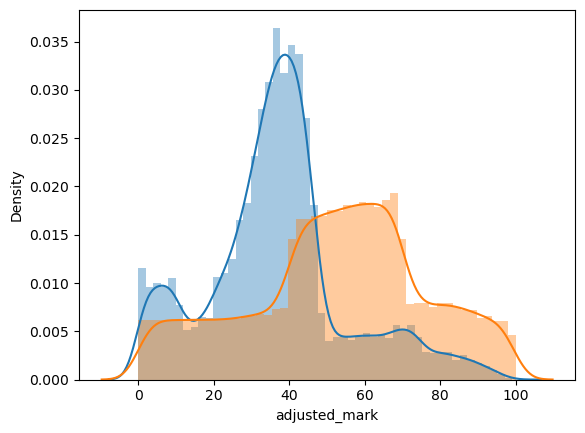

In [91]:
sns.distplot(updated_students.loc[updated_students.mark.notnull(),"mark"])
sns.distplot(updated_students.loc[updated_students.adjusted_mark.notnull(),"adjusted_mark"])

[Text(0, 0, 'Pass'),
 Text(1, 0, 'Distinction'),
 Text(2, 0, 'Fail'),
 Text(3, 0, 'Withdrawn')]

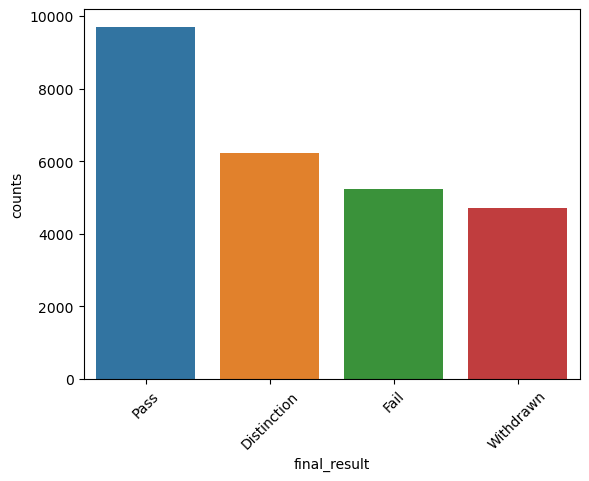

In [92]:
result_counts =  pd.DataFrame(updated_students.final_result.value_counts()).reset_index()
result_counts = result_counts.rename(columns={"index": "final_result", "final_result":"counts"})

chart = sns.barplot(x="final_result", y="counts"  ,data=result_counts)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [93]:
#!pip install scikit-learn==1.2.2

[Text(0, 0, 'A Level or Equivalent'),
 Text(1, 0, 'Lower Than A Level'),
 Text(2, 0, 'HE Qualification'),
 Text(3, 0, 'Post Graduate Qualification'),
 Text(4, 0, 'No Formal quals')]

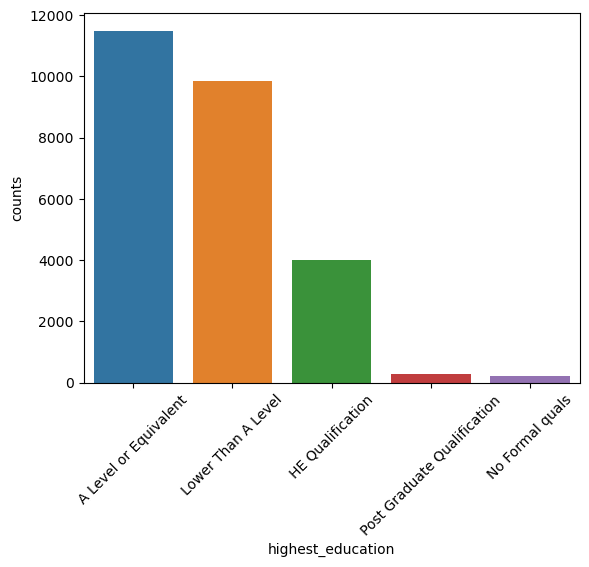

In [94]:
education_counts =  pd.DataFrame(updated_students.highest_education.value_counts()).reset_index()
education_counts = education_counts.rename(columns={"index": "highest_education", "highest_education":"counts"})

chart = sns.barplot(x="highest_education", y="counts"  ,data=education_counts)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [95]:
# Merge highest_education groups into 2 main groups
updated_students["edu"] = list(map(lambda x: "HE or higher" if (x in ["HE Qualification", "Post Graduate Qualification"]) \
                else "Level or lower",updated_students.highest_education))

updated_students = updated_students.drop(["total_score*weight","highest_education","module_presentation"], axis=1)

In [96]:
updated_students

,id_student,code_module,code_presentation,attempted_weight,adjusted_mark,mark,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,edu
0,6516,AAA,2014J,100.0,48.055203,31.8,M,Scotland,80-90%,55<=,0,60,N,Pass,HE or higher
1,8462,DDD,2013J,40.0,NaN,NaN,M,London Region,30-40%,55<=,0,90,N,Withdrawn,HE or higher
2,8462,DDD,2014J,50.0,NaN,NaN,M,London Region,30-40%,55<=,1,60,N,Withdrawn,HE or higher
3,11391,AAA,2013J,100.0,64.006980,41.2,M,East Anglian Region,90-100%,55<=,0,240,N,Pass,HE or higher
4,23629,BBB,2013B,25.0,13.803681,8.3,F,East Anglian Region,20-30%,0-35,2,60,N,Fail,Level or lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,2698257,AAA,2013J,100.0,52.388959,34.7,M,East Midlands Region,60-70%,0-35,0,120,N,Pass,Level or lower
25839,2698535,CCC,2014B,39.0,NaN,NaN,M,Wales,50-60%,0-35,0,60,N,Withdrawn,Level or lower
25840,2698535,EEE,2013J,100.0,43.023477,26.7,M,Wales,50-60%,0-35,0,60,N,Pass,Level or lower
25841,2698577,BBB,2014J,100.0,33.481595,27.9,F,Wales,50-60%,35-55,0,60,N,Fail,Level or lower


In [97]:
updated_students_new = updated_students.iloc[:, 1:]

In [98]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

In [99]:
updated_students_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25843 entries, 0 to 25842
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           25843 non-null  object 
 1   code_presentation     25843 non-null  object 
 2   attempted_weight      25843 non-null  float64
 3   adjusted_mark         21148 non-null  float64
 4   mark                  21148 non-null  float64
 5   gender                25843 non-null  object 
 6   region                25843 non-null  object 
 7   imd_band              24845 non-null  object 
 8   age_band              25843 non-null  object 
 9   num_of_prev_attempts  25843 non-null  int64  
 10  studied_credits       25843 non-null  int64  
 11  disability            25843 non-null  object 
 12  final_result          25843 non-null  object 
 13  edu                   25843 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 4.0+ MB


In [100]:
updated_students_new1 = updated_students_new

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [102]:
updated_students_new1

,code_module,code_presentation,attempted_weight,adjusted_mark,mark,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,edu
0,AAA,2014J,100.0,48.055203,31.8,M,Scotland,80-90%,55<=,0,60,N,Pass,HE or higher
1,DDD,2013J,40.0,NaN,NaN,M,London Region,30-40%,55<=,0,90,N,Withdrawn,HE or higher
2,DDD,2014J,50.0,NaN,NaN,M,London Region,30-40%,55<=,1,60,N,Withdrawn,HE or higher
3,AAA,2013J,100.0,64.006980,41.2,M,East Anglian Region,90-100%,55<=,0,240,N,Pass,HE or higher
4,BBB,2013B,25.0,13.803681,8.3,F,East Anglian Region,20-30%,0-35,2,60,N,Fail,Level or lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,AAA,2013J,100.0,52.388959,34.7,M,East Midlands Region,60-70%,0-35,0,120,N,Pass,Level or lower
25839,CCC,2014B,39.0,NaN,NaN,M,Wales,50-60%,0-35,0,60,N,Withdrawn,Level or lower
25840,EEE,2013J,100.0,43.023477,26.7,M,Wales,50-60%,0-35,0,60,N,Pass,Level or lower
25841,BBB,2014J,100.0,33.481595,27.9,F,Wales,50-60%,35-55,0,60,N,Fail,Level or lower


In [103]:
updated_students_new1["code_module"] = le.fit_transform(updated_students_new1["code_module"])
updated_students_new1["code_presentation"] = le.fit_transform(updated_students_new1["code_presentation"])
updated_students_new1["gender"] = le.fit_transform(updated_students_new1["gender"])
updated_students_new1["region"] = le.fit_transform(updated_students_new1["region"])
# updated_students_new1["imd_band"] = le.fit_transform(updated_students_new1["imd_band"])
updated_students_new1["age_band"] = le.fit_transform(updated_students_new1["age_band"])
updated_students_new1["disability"] = le.fit_transform(updated_students_new1["disability"])
updated_students_new1["edu"] = le.fit_transform(updated_students_new1["edu"])

In [104]:
updated_students_new1

,code_module,code_presentation,attempted_weight,adjusted_mark,mark,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,edu
0,0,3,100.0,48.055203,31.8,1,6,80-90%,2,0,60,0,Pass,0
1,3,1,40.0,NaN,NaN,1,3,30-40%,2,0,90,0,Withdrawn,0
2,3,3,50.0,NaN,NaN,1,3,30-40%,2,1,60,0,Withdrawn,0
3,0,1,100.0,64.006980,41.2,1,0,90-100%,2,0,240,0,Pass,0
4,1,0,25.0,13.803681,8.3,0,0,20-30%,0,2,60,0,Fail,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,0,1,100.0,52.388959,34.7,1,1,60-70%,0,0,120,0,Pass,1
25839,2,2,39.0,NaN,NaN,1,10,50-60%,0,0,60,0,Withdrawn,1
25840,4,1,100.0,43.023477,26.7,1,10,50-60%,0,0,60,0,Pass,1
25841,1,3,100.0,33.481595,27.9,0,10,50-60%,1,0,60,0,Fail,1


In [105]:
updated_students_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25843 entries, 0 to 25842
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           25843 non-null  int32  
 1   code_presentation     25843 non-null  int32  
 2   attempted_weight      25843 non-null  float64
 3   adjusted_mark         21148 non-null  float64
 4   mark                  21148 non-null  float64
 5   gender                25843 non-null  int32  
 6   region                25843 non-null  int32  
 7   imd_band              24845 non-null  object 
 8   age_band              25843 non-null  int32  
 9   num_of_prev_attempts  25843 non-null  int64  
 10  studied_credits       25843 non-null  int64  
 11  disability            25843 non-null  int32  
 12  final_result          25843 non-null  object 
 13  edu                   25843 non-null  int32  
dtypes: float64(3), int32(7), int64(2), object(2)
memory usage: 3.3+ MB


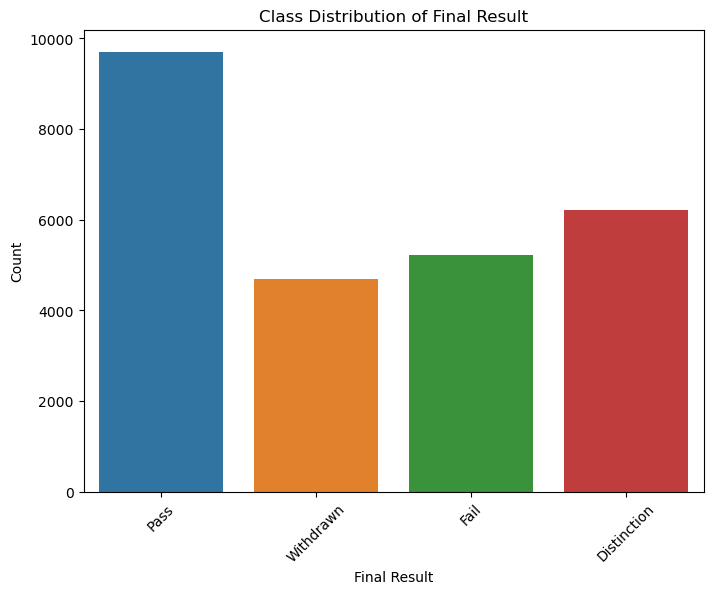

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='final_result', data=updated_students_new1)
plt.xlabel('Final Result')
plt.ylabel('Count')
plt.title('Class Distribution of Final Result')
plt.xticks(rotation=45)
plt.show()

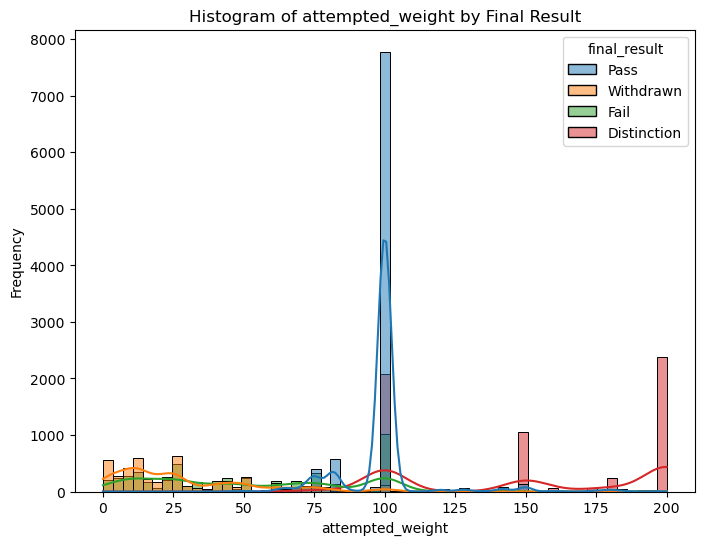

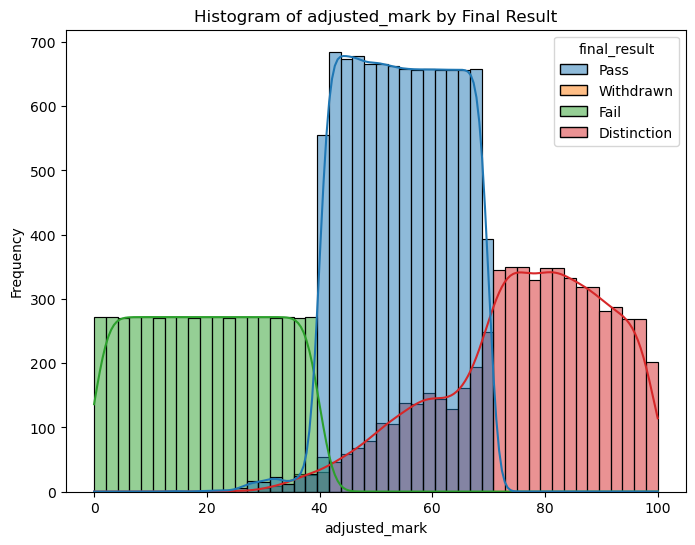

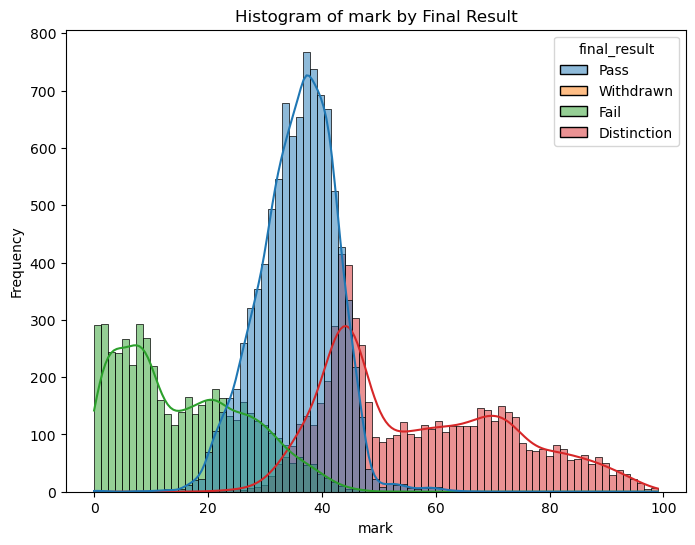

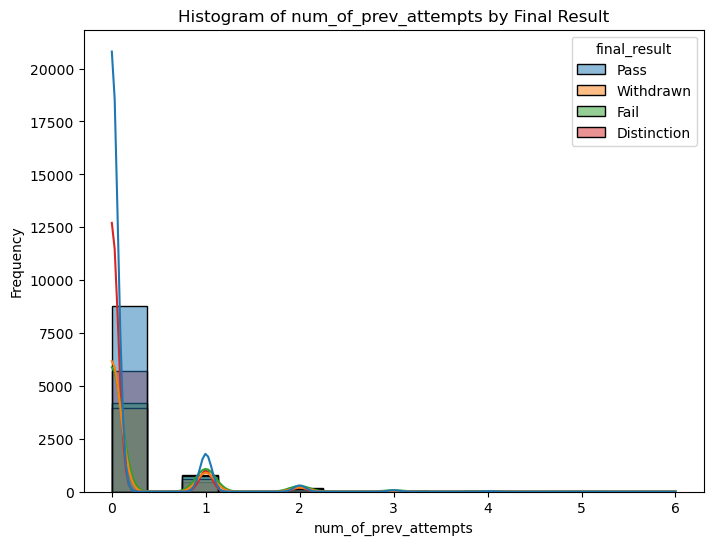

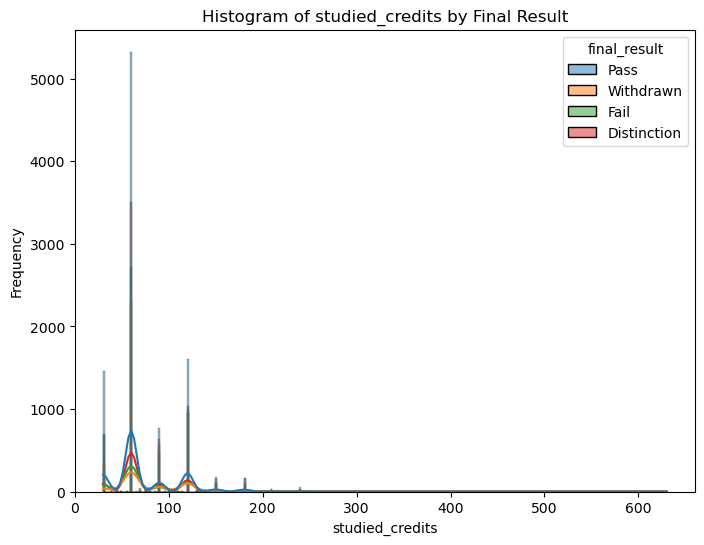

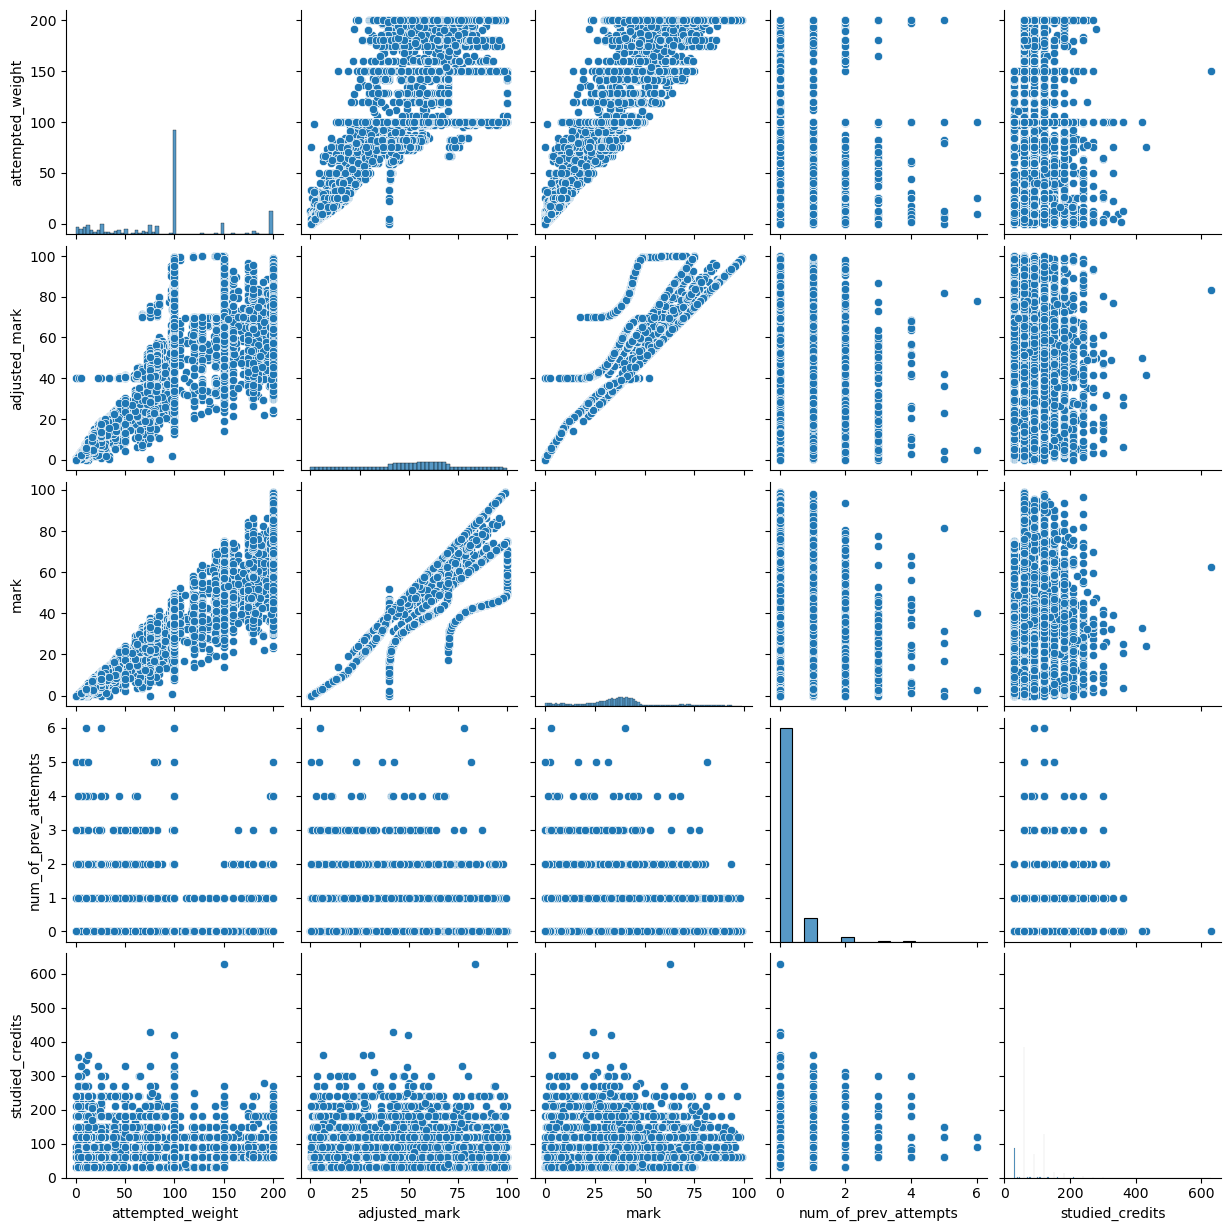

In [107]:
# Numeric Feature Histograms
numeric_columns = updated_students_new1.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(updated_students_new1, x=col, hue='final_result', kde=True, common_norm=False)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col} by Final Result')
    plt.show()

# Pairwise Scatter Plots for Numeric Features
sns.pairplot(updated_students_new1[numeric_columns])
plt.show()

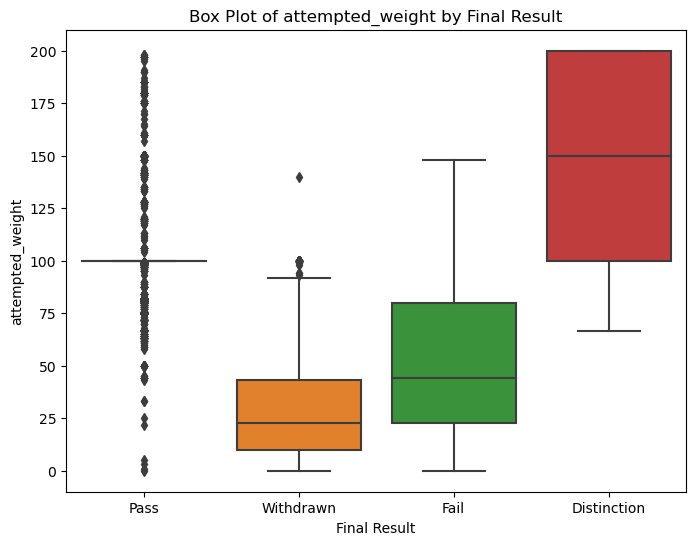

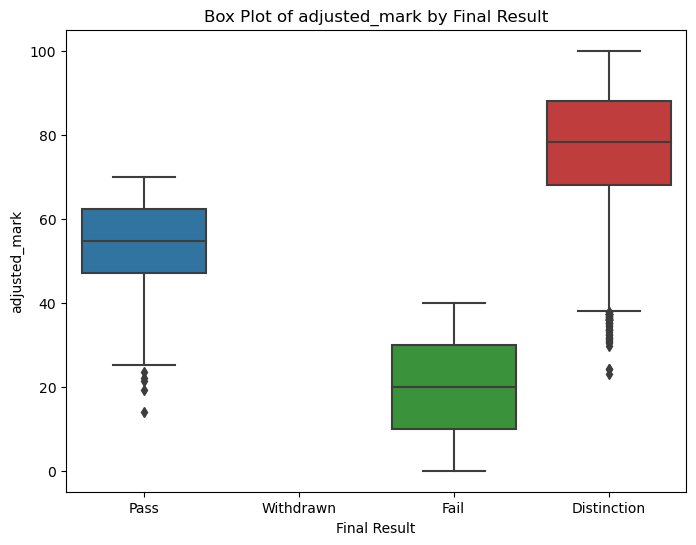

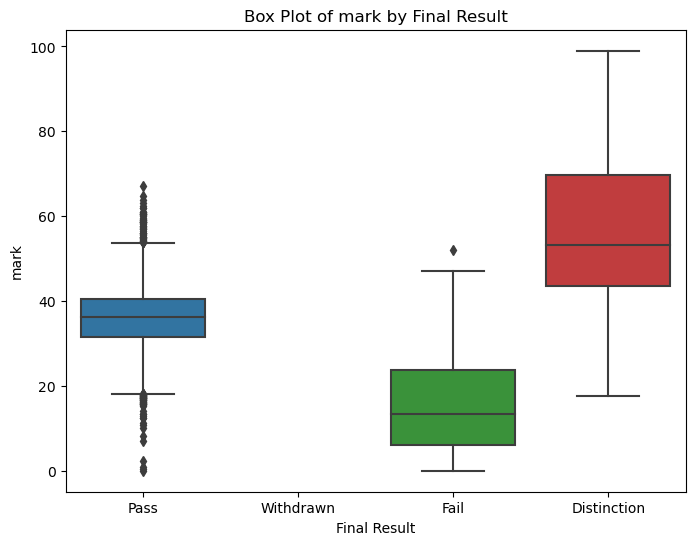

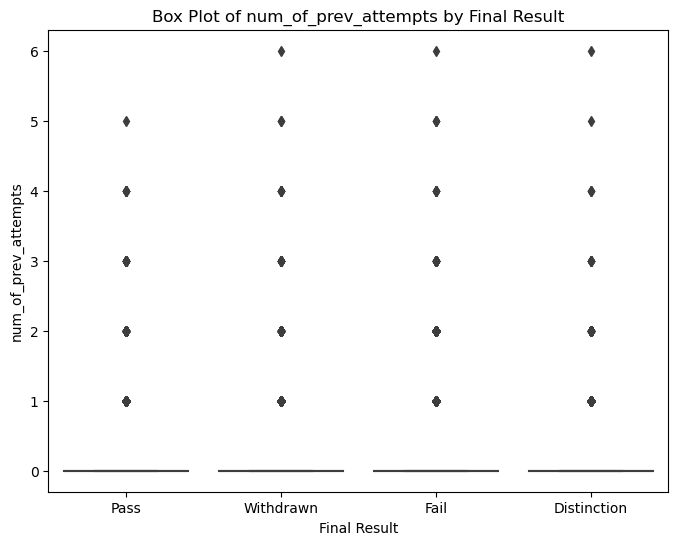

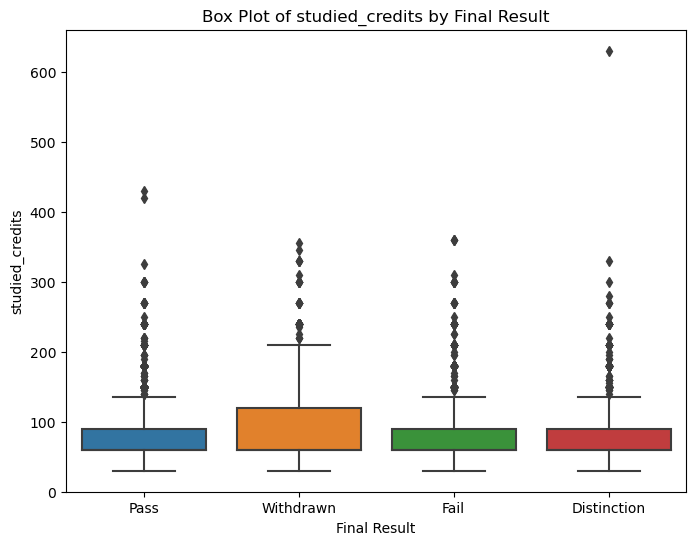

In [108]:
# Box Plots for Numeric Features by Final Result
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='final_result', y=col, data=updated_students_new1)
    plt.xlabel('Final Result')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} by Final Result')
    plt.show()

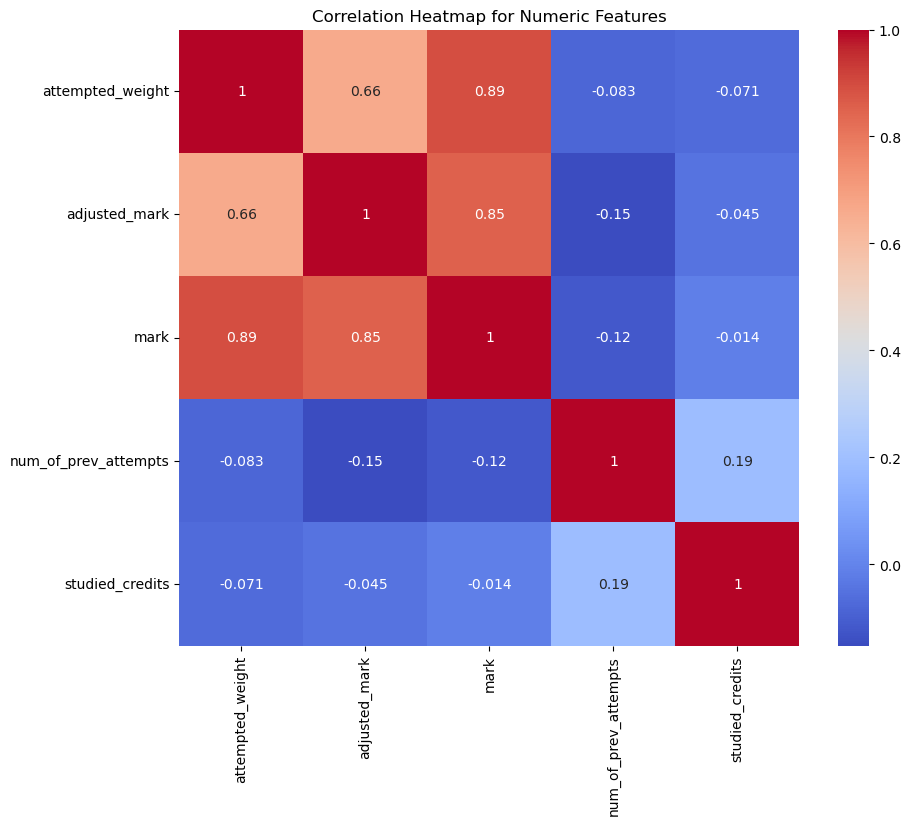

In [109]:
# Correlation Heatmap for Numeric Features
correlation_matrix = updated_students_new1[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

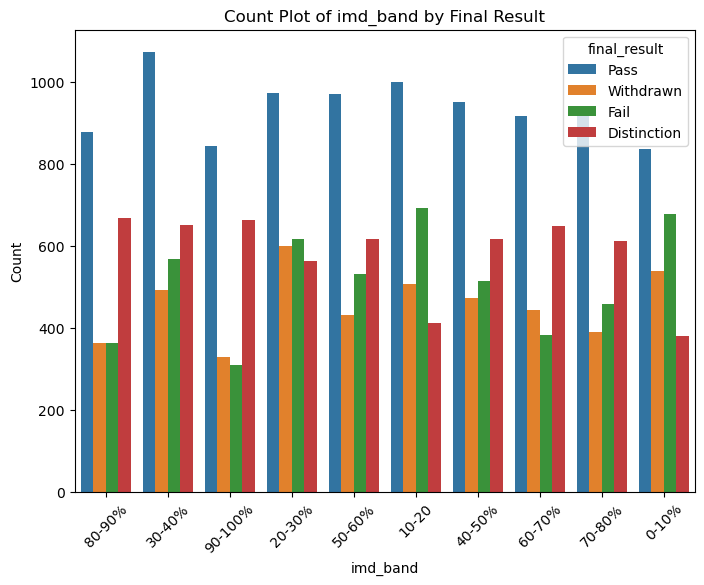

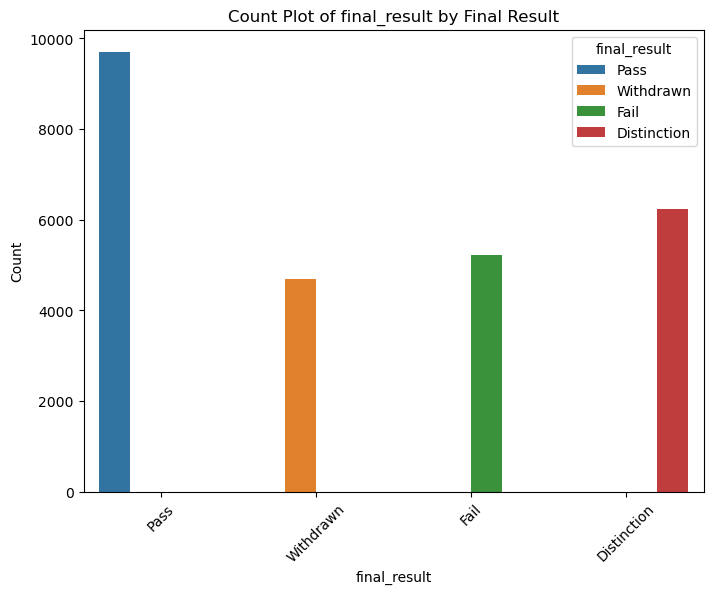

In [110]:
# Categorical Feature Count Plots
categorical_columns = updated_students_new1.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='final_result', data=updated_students_new1)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {col} by Final Result')
    plt.xticks(rotation=45)
    plt.show()

In [176]:
updated_students_new2 = updated_students_new1.dropna(axis = 0)
x1,y1 = updated_students_new2.drop(['final_result','imd_band','region'], axis = 1), updated_students_new2['final_result'].map( {'Pass':1, 'Withdrawn':3, 'Fail':0, 'Distinction':2} )

In [177]:
y1

0        1
1        3
2        3
3        1
4        0
        ..
25838    1
25839    3
25840    1
25841    0
25842    2
Name: final_result, Length: 24845, dtype: int64

In [178]:
y1.unique()

array([1, 3, 0, 2], dtype=int64)

In [179]:
x1

,code_module,code_presentation,attempted_weight,adjusted_mark,mark,gender,age_band,num_of_prev_attempts,studied_credits,disability,edu
0,0,3,100.0,48.055203,31.800000,1,2,0,60,0,0
1,3,1,40.0,52.510951,36.910862,1,2,0,90,0,0
2,3,3,50.0,52.510951,36.910862,1,2,1,60,0,0
3,0,1,100.0,64.006980,41.200000,1,2,0,240,0,0
4,1,0,25.0,13.803681,8.300000,0,0,2,60,0,1
...,...,...,...,...,...,...,...,...,...,...,...
25838,0,1,100.0,52.388959,34.700000,1,0,0,120,0,1
25839,2,2,39.0,52.510951,36.910862,1,0,0,60,0,1
25840,4,1,100.0,43.023477,26.700000,1,0,0,60,0,1
25841,1,3,100.0,33.481595,27.900000,0,1,0,60,0,1


### Splitting the Data into Train and Test sets

In [180]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3, random_state = 10)

### SMOTE - Synthetic Minority Over-sampling Technique

In [181]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Creating a SMOTE object
smote = SMOTE(sampling_strategy='auto')  

# Applying SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(x_train1, y_train1)


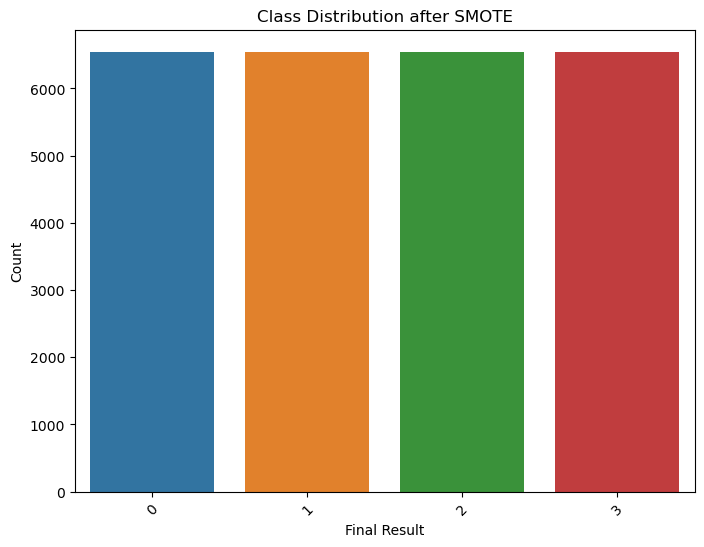

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_resampled' is your target variable after applying SMOTE
# Create a DataFrame with the resampled data
resampled_data = pd.DataFrame({'final_result': y_resampled})

# Plot the count of each class after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x='final_result', data=resampled_data)
plt.xlabel('Final Result')
plt.ylabel('Count')
plt.title('Class Distribution after SMOTE')
plt.xticks(rotation=45)
plt.show()


In [123]:
updated_students_new.isna().sum()

code_module                0
code_presentation          0
attempted_weight           0
adjusted_mark           4695
mark                    4695
gender                     0
region                     0
imd_band                 998
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
edu                        0
dtype: int64

In [124]:
updated_students_new['adjusted_mark'] = updated_students_new['adjusted_mark'].fillna(value = updated_students_new['adjusted_mark'].mean())

In [125]:
updated_students_new['mark'] = updated_students_new['mark'].fillna(value = updated_students_new['mark'].mean())

In [126]:
updated_students_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25843 entries, 0 to 25842
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           25843 non-null  int32  
 1   code_presentation     25843 non-null  int32  
 2   attempted_weight      25843 non-null  float64
 3   adjusted_mark         25843 non-null  float64
 4   mark                  25843 non-null  float64
 5   gender                25843 non-null  int32  
 6   region                25843 non-null  int32  
 7   imd_band              24845 non-null  object 
 8   age_band              25843 non-null  int32  
 9   num_of_prev_attempts  25843 non-null  int64  
 10  studied_credits       25843 non-null  int64  
 11  disability            25843 non-null  int32  
 12  final_result          25843 non-null  object 
 13  edu                   25843 non-null  int32  
dtypes: float64(3), int32(7), int64(2), object(2)
memory usage: 3.3+ MB


In [127]:
updated_students_new.dropna(inplace = True)

In [128]:
updated_students_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24845 entries, 0 to 25842
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           24845 non-null  int32  
 1   code_presentation     24845 non-null  int32  
 2   attempted_weight      24845 non-null  float64
 3   adjusted_mark         24845 non-null  float64
 4   mark                  24845 non-null  float64
 5   gender                24845 non-null  int32  
 6   region                24845 non-null  int32  
 7   imd_band              24845 non-null  object 
 8   age_band              24845 non-null  int32  
 9   num_of_prev_attempts  24845 non-null  int64  
 10  studied_credits       24845 non-null  int64  
 11  disability            24845 non-null  int32  
 12  final_result          24845 non-null  object 
 13  edu                   24845 non-null  int32  
dtypes: float64(3), int32(7), int64(2), object(2)
memory usage: 2.2+ MB


### One Hot Encoding

In [129]:
gender_one_hot_encodings = pd.get_dummies(updated_students_new.gender, prefix = 'gender')
print("\nThe columns are: ", gender_one_hot_encodings.columns)
print("\nThe head of the dataframe: ", gender_one_hot_encodings.head())


The columns are:  Index(['gender_0', 'gender_1'], dtype='object')

The head of the dataframe:     gender_0  gender_1
0         0         1
1         0         1
2         0         1
3         0         1
4         1         0


In [130]:
region_one_hot_encodings = pd.get_dummies(updated_students_new.region, prefix = 'region')
print("\nThe columns are: ", region_one_hot_encodings.columns)
print("\nThe head of the dataframe: ", region_one_hot_encodings.head())


The columns are:  Index(['region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5',
       'region_6', 'region_7', 'region_8', 'region_9', 'region_10',
       'region_11', 'region_12'],
      dtype='object')

The head of the dataframe:     region_0  region_1  region_2  region_3  region_4  region_5  region_6  \
0         0         0         0         0         0         0         1   
1         0         0         0         1         0         0         0   
2         0         0         0         1         0         0         0   
3         1         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

   region_7  region_8  region_9  region_10  region_11  region_12  
0         0         0         0          0          0          0  
1         0         0         0          0          0          0  
2         0         0         0          0          0          0  
3         0         0         

In [131]:
imd_one_hot_encodings = pd.get_dummies(updated_students_new.imd_band, prefix = 'imd')
print("\nThe columns are: ", imd_one_hot_encodings.columns)
print("\nThe head of the dataframe: ", imd_one_hot_encodings.head())


The columns are:  Index(['imd_0-10%', 'imd_10-20', 'imd_20-30%', 'imd_30-40%', 'imd_40-50%',
       'imd_50-60%', 'imd_60-70%', 'imd_70-80%', 'imd_80-90%', 'imd_90-100%'],
      dtype='object')

The head of the dataframe:     imd_0-10%  imd_10-20  imd_20-30%  imd_30-40%  imd_40-50%  imd_50-60%  \
0          0          0           0           0           0           0   
1          0          0           0           1           0           0   
2          0          0           0           1           0           0   
3          0          0           0           0           0           0   
4          0          0           1           0           0           0   

   imd_60-70%  imd_70-80%  imd_80-90%  imd_90-100%  
0           0           0           1            0  
1           0           0           0            0  
2           0           0           0            0  
3           0           0           0            1  
4           0           0           0            0  


In [132]:
age_one_hot_encodings = pd.get_dummies(updated_students_new.age_band, prefix = 'age')
print("\nThe columns are: ", age_one_hot_encodings.columns)


The columns are:  Index(['age_0', 'age_1', 'age_2'], dtype='object')


In [133]:
disable_one_hot_encodings = pd.get_dummies(updated_students_new.disability, prefix = 'disable')
print("\nThe columns are: ", disable_one_hot_encodings.columns)


The columns are:  Index(['disable_0', 'disable_1'], dtype='object')


In [134]:
edu_one_hot_encodings = pd.get_dummies(updated_students_new.edu, prefix = 'edu')
print("\nThe columns are: ", edu_one_hot_encodings.columns)


The columns are:  Index(['edu_0', 'edu_1'], dtype='object')


In [135]:
# dummy_df = pd.get_dummies(data = updated_students_new, columns = [gender, region, imd_band, age_band, disability, edu], prefix = ['gender','region','imd','age','disability','edu'])

In [136]:
final_student_data = gender_one_hot_encodings.join([region_one_hot_encodings, imd_one_hot_encodings, age_one_hot_encodings, disable_one_hot_encodings, edu_one_hot_encodings, updated_students_new])

In [137]:
final_student_data['finalresult_cat'] = final_student_data['final_result'].map( {'Pass':1, 'Withdrawn':3, 'Fail':0, 'Distinction':2} )

In [138]:
final_student_data

,gender_0,gender_1,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,...,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,edu,finalresult_cat
0,0,1,0,0,0,0,0,0,1,0,...,1,6,80-90%,2,0,60,0,Pass,0,1
1,0,1,0,0,0,1,0,0,0,0,...,1,3,30-40%,2,0,90,0,Withdrawn,0,3
2,0,1,0,0,0,1,0,0,0,0,...,1,3,30-40%,2,1,60,0,Withdrawn,0,3
3,0,1,1,0,0,0,0,0,0,0,...,1,0,90-100%,2,0,240,0,Pass,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,20-30%,0,2,60,0,Fail,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,0,1,0,1,0,0,0,0,0,0,...,1,1,60-70%,0,0,120,0,Pass,1,1
25839,0,1,0,0,0,0,0,0,0,0,...,1,10,50-60%,0,0,60,0,Withdrawn,1,3
25840,0,1,0,0,0,0,0,0,0,0,...,1,10,50-60%,0,0,60,0,Pass,1,1
25841,1,0,0,0,0,0,0,0,0,0,...,0,10,50-60%,1,0,60,0,Fail,1,0


In [139]:
final_student_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24845 entries, 0 to 25842
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender_0              24845 non-null  uint8  
 1   gender_1              24845 non-null  uint8  
 2   region_0              24845 non-null  uint8  
 3   region_1              24845 non-null  uint8  
 4   region_2              24845 non-null  uint8  
 5   region_3              24845 non-null  uint8  
 6   region_4              24845 non-null  uint8  
 7   region_5              24845 non-null  uint8  
 8   region_6              24845 non-null  uint8  
 9   region_7              24845 non-null  uint8  
 10  region_8              24845 non-null  uint8  
 11  region_9              24845 non-null  uint8  
 12  region_10             24845 non-null  uint8  
 13  region_11             24845 non-null  uint8  
 14  region_12             24845 non-null  uint8  
 15  imd_0-10%          

In [140]:
new_final_student_data = final_student_data.drop(['gender_0','disable_0','edu_0','code_module','code_presentation','gender','region','imd_band','age_band','disability','edu','final_result'], axis = 1)

In [141]:
new_final_student_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24845 entries, 0 to 25842
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender_1              24845 non-null  uint8  
 1   region_0              24845 non-null  uint8  
 2   region_1              24845 non-null  uint8  
 3   region_2              24845 non-null  uint8  
 4   region_3              24845 non-null  uint8  
 5   region_4              24845 non-null  uint8  
 6   region_5              24845 non-null  uint8  
 7   region_6              24845 non-null  uint8  
 8   region_7              24845 non-null  uint8  
 9   region_8              24845 non-null  uint8  
 10  region_9              24845 non-null  uint8  
 11  region_10             24845 non-null  uint8  
 12  region_11             24845 non-null  uint8  
 13  region_12             24845 non-null  uint8  
 14  imd_0-10%             24845 non-null  uint8  
 15  imd_10-20          

In [142]:
new_final_student_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24845 entries, 0 to 25842
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender_1              24845 non-null  uint8  
 1   region_0              24845 non-null  uint8  
 2   region_1              24845 non-null  uint8  
 3   region_2              24845 non-null  uint8  
 4   region_3              24845 non-null  uint8  
 5   region_4              24845 non-null  uint8  
 6   region_5              24845 non-null  uint8  
 7   region_6              24845 non-null  uint8  
 8   region_7              24845 non-null  uint8  
 9   region_8              24845 non-null  uint8  
 10  region_9              24845 non-null  uint8  
 11  region_10             24845 non-null  uint8  
 12  region_11             24845 non-null  uint8  
 13  region_12             24845 non-null  uint8  
 14  imd_0-10%             24845 non-null  uint8  
 15  imd_10-20          

<Axes: >

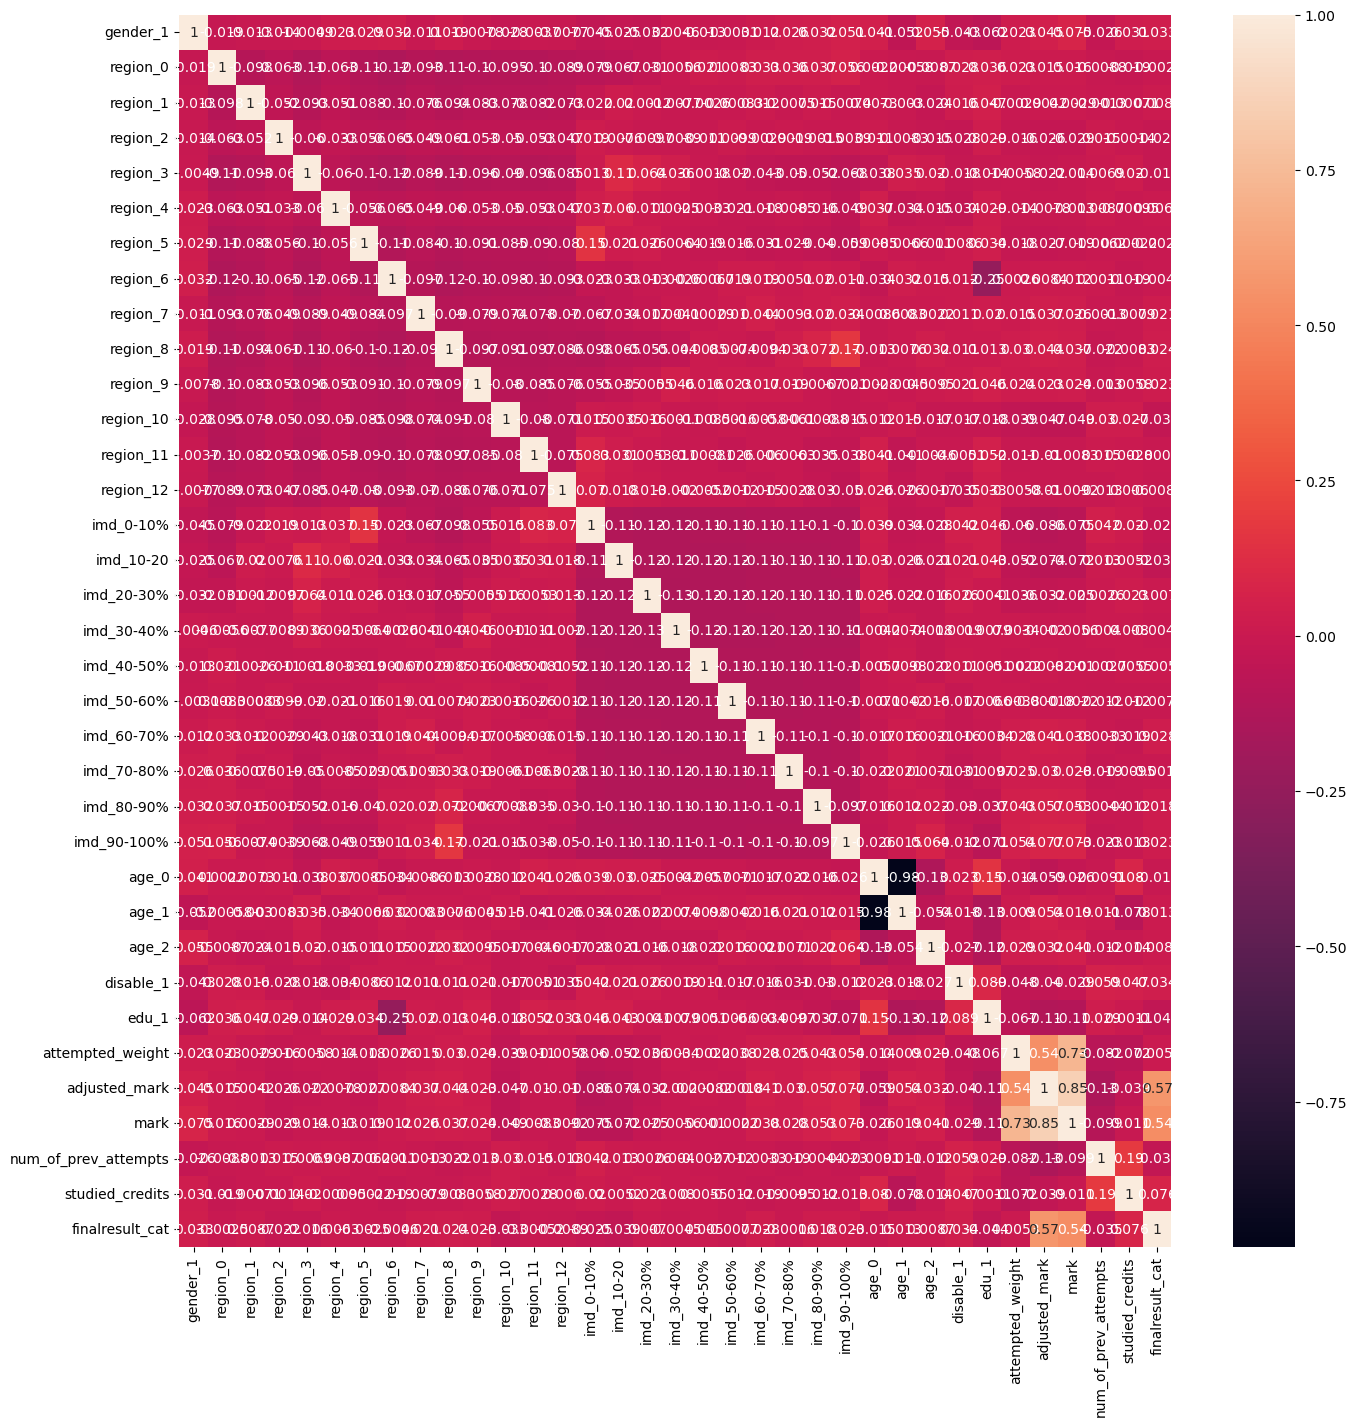

In [143]:
plt.figure(figsize = (16,16))
sns.heatmap(new_final_student_data.corr(), annot=True)

In [144]:
new_final_student_data

,gender_1,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,...,age_1,age_2,disable_1,edu_1,attempted_weight,adjusted_mark,mark,num_of_prev_attempts,studied_credits,finalresult_cat
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,100.0,48.055203,31.800000,0,60,1
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,40.0,52.510951,36.910862,0,90,3
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,50.0,52.510951,36.910862,1,60,3
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,100.0,64.006980,41.200000,0,240,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,25.0,13.803681,8.300000,2,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,100.0,52.388959,34.700000,0,120,1
25839,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,39.0,52.510951,36.910862,0,60,3
25840,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,100.0,43.023477,26.700000,0,60,1
25841,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,100.0,33.481595,27.900000,0,60,0


### Correlation

In [145]:
corr = new_final_student_data.corr()

In [146]:
corr_finalresult = pd.DataFrame(corr['finalresult_cat'].drop('finalresult_cat'))
corr_finalresult.sort_values(by = 'finalresult_cat', ascending = False)

,finalresult_cat
adjusted_mark,0.573442
mark,0.535049
studied_credits,0.076011
disable_1,0.034295
gender_1,0.033174
imd_60-70%,0.027704
region_8,0.024107
region_9,0.023352
imd_90-100%,0.022999
region_7,0.020935


In [147]:
y = new_final_student_data.finalresult_cat

In [148]:
x = new_final_student_data.drop('finalresult_cat', axis = 1)

In [149]:
x.columns

Index(['gender_1', 'region_0', 'region_1', 'region_2', 'region_3', 'region_4',
       'region_5', 'region_6', 'region_7', 'region_8', 'region_9', 'region_10',
       'region_11', 'region_12', 'imd_0-10%', 'imd_10-20', 'imd_20-30%',
       'imd_30-40%', 'imd_40-50%', 'imd_50-60%', 'imd_60-70%', 'imd_70-80%',
       'imd_80-90%', 'imd_90-100%', 'age_0', 'age_1', 'age_2', 'disable_1',
       'edu_1', 'attempted_weight', 'adjusted_mark', 'mark',
       'num_of_prev_attempts', 'studied_credits'],
      dtype='object')

In [150]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [151]:
test_plot=[]
train_plot=[]

for j in range(1,10,1):
     clf=DecisionTreeClassifier(max_depth=j,random_state=101)
     clf.fit(x_train,y_train)
     predict=clf.predict(x_test)
     accuracy_test=round(clf.score(x_test,y_test)*100,2)
     accuracy_train=round(clf.score(x_train,y_train)*100,2)
     print(j)
     #print('train accuracy of decision tree classifier',accuracy_train)
     #print('test accuracy of decision tree classifier',accuracy_test)
     test_plot.append(accuracy_test)
     train_plot.append(accuracy_train)

1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'Accuracy')

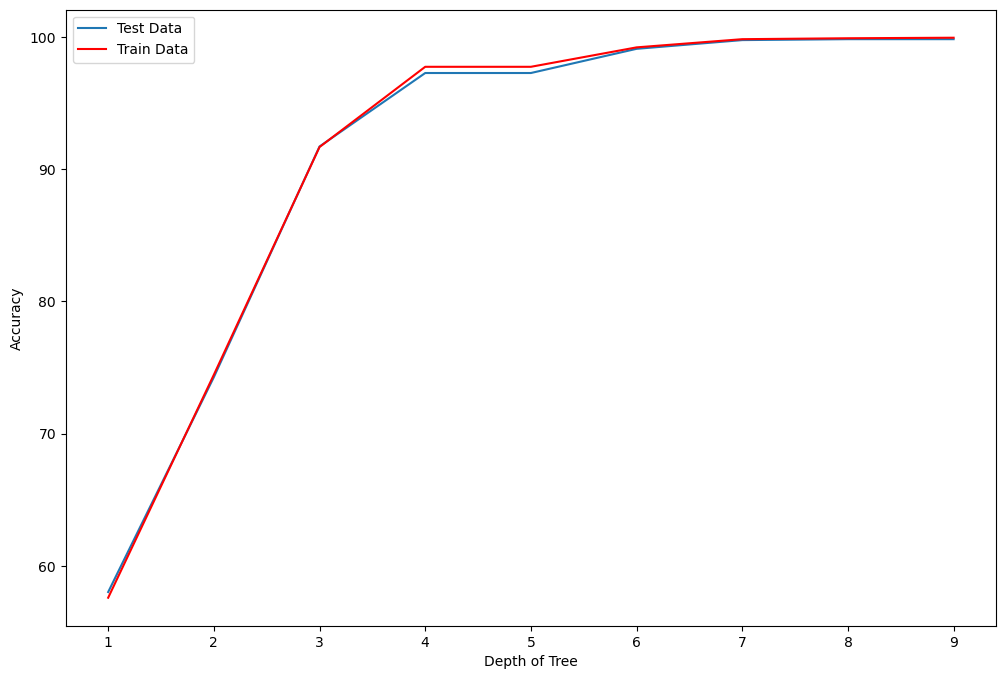

In [152]:
fig,axes=plt.subplots(1,1,figsize=(12,8))

axes.set_xticks(range(1,10,1))
depth_val=range(1,10,1)

plt.plot(depth_val,test_plot)      #plt.plot(depth_val,test_plot, label='Test Data')
plt.plot(depth_val,train_plot,'r') #plt.plot(depth_val,train_plot,'r', label='Train Data')
plt.legend(["Test Data", "Train Data"], loc =0) #plt.legend() #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)

plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy")

In [153]:
# Decision tree with depth = 2
clf2 = DecisionTreeClassifier(random_state=1, max_depth=2)
clf2.fit(x_train, y_train)
clf2_score_train = clf2.score(x_train, y_train)
print("Training score: ",clf2_score_train)
clf2_score_test = clf2.score(x_test, y_test)
print("Testing score: ",clf2_score_test)

Training score:  0.7444655281467426
Testing score:  0.7426884894016635


In [154]:
# Decision tree with depth = 3
clf3 = DecisionTreeClassifier(random_state=1, max_depth=3)
clf3.fit(x_train, y_train)
clf3_score_train = clf3.score(x_train, y_train)
print("Training score: ",clf3_score_train)
clf3_score_test = clf3.score(x_test, y_test)
print("Testing score: ",clf3_score_test)

Training score:  0.9167960439307687
Testing score:  0.9172256506573652


In [155]:
# Decision tree with depth = 4
clf4 = DecisionTreeClassifier(random_state=1, max_depth=4)
clf4.fit(x_train, y_train)
clf4_score_train = clf4.score(x_train, y_train)
print("Training score: ",clf4_score_train)
clf4_score_test = clf4.score(x_test, y_test)
print("Testing score: ",clf4_score_test)

Training score:  0.9775171065493646
Testing score:  0.9727662999731688


In [156]:
# Decision tree with full depth
clf_fulldepth = DecisionTreeClassifier()
clf_fulldepth.fit(x_train, y_train)
clf_fulldepth_score_train = clf_fulldepth.score(x_train, y_train)
print("Training score: ",clf_fulldepth_score_train)
clf_fulldepth_score_test = clf_fulldepth.score(x_test, y_test)
print("Testing score: ",clf_fulldepth_score_test)

#Model got overfitted with full depth

Training score:  1.0
Testing score:  0.9983901261067883


We have use different depths for the Decision Tree.Increasing the depth of the decision tree generally improves accuracy, but it raises the risk of overfitting.The depth-3 tree achieves near-perfect accuracy, but careful consideration is needed to ensure it doesn't memorize the training data and performs well on new data.
Model evaluation metrics beyond accuracy, such as precision, recall, and F1-score, would provide a more comprehensive understanding of model performance and potential overfitting. Additionally, visualizing the decision tree structure could offer insights into the learned patterns.

In [157]:
#Analysis Training and Testing scores with different depths of decision tree

pd.DataFrame({'Depth':[2,3,4,'full'], 'Training score':[clf2_score_train,clf3_score_train,clf4_score_train,clf_fulldepth_score_train], 'Testing score':[clf2_score_test,clf3_score_test,clf4_score_test,clf_fulldepth_score_test]})


,Depth,Training score,Testing score
0,2,0.744466,0.742688
1,3,0.916796,0.917226
2,4,0.977517,0.972766
3,full,1.000000,0.998390


In [158]:
clf2.classes_

array([0, 1, 2, 3], dtype=int64)

### Generating Tree

In [159]:
#Generate Tree

features = x.columns.tolist()
tree.export_graphviz(clf4, out_file='tree_depth_4.dot', feature_names=features)

In [160]:
features

['gender_1',
 'region_0',
 'region_1',
 'region_2',
 'region_3',
 'region_4',
 'region_5',
 'region_6',
 'region_7',
 'region_8',
 'region_9',
 'region_10',
 'region_11',
 'region_12',
 'imd_0-10%',
 'imd_10-20',
 'imd_20-30%',
 'imd_30-40%',
 'imd_40-50%',
 'imd_50-60%',
 'imd_60-70%',
 'imd_70-80%',
 'imd_80-90%',
 'imd_90-100%',
 'age_0',
 'age_1',
 'age_2',
 'disable_1',
 'edu_1',
 'attempted_weight',
 'adjusted_mark',
 'mark',
 'num_of_prev_attempts',
 'studied_credits']

In [161]:
text_representation = tree.export_text(clf4)
print(text_representation)

|--- feature_30 <= 40.00
|   |--- feature_29 <= 149.00
|   |   |--- class: 0
|   |--- feature_29 >  149.00
|   |   |--- feature_29 <= 199.00
|   |   |   |--- class: 1
|   |   |--- feature_29 >  199.00
|   |   |   |--- class: 2
|--- feature_30 >  40.00
|   |--- feature_29 <= 62.75
|   |   |--- feature_30 <= 48.11
|   |   |   |--- class: 1
|   |   |--- feature_30 >  48.11
|   |   |   |--- class: 3
|   |--- feature_29 >  62.75
|   |   |--- feature_30 <= 70.00
|   |   |   |--- feature_29 <= 149.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_29 >  149.00
|   |   |   |   |--- class: 2
|   |   |--- feature_30 >  70.00
|   |   |   |--- class: 2



### Random Forest

In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
Classifier = RandomForestRegressor(n_estimators=20, random_state=0)
Classifier.fit(x_train, y_train)
# make predictions for test data
y_pred = Classifier.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix :\n",cm)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
RF_classification_report = classification_report(y_test, predictions)
print("Random Forest Classification Report:")
print(RF_classification_report)


Confusion Matrix :
 [[1544    0    0    0]
 [   0 2809    5    0]
 [   0    3 1724    0]
 [   0    0    0 1369]]
Accuracy: 99.89%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1544
           1       1.00      1.00      1.00      2814
           2       1.00      1.00      1.00      1727
           3       1.00      1.00      1.00      1369

    accuracy                           1.00      7454
   macro avg       1.00      1.00      1.00      7454
weighted avg       1.00      1.00      1.00      7454



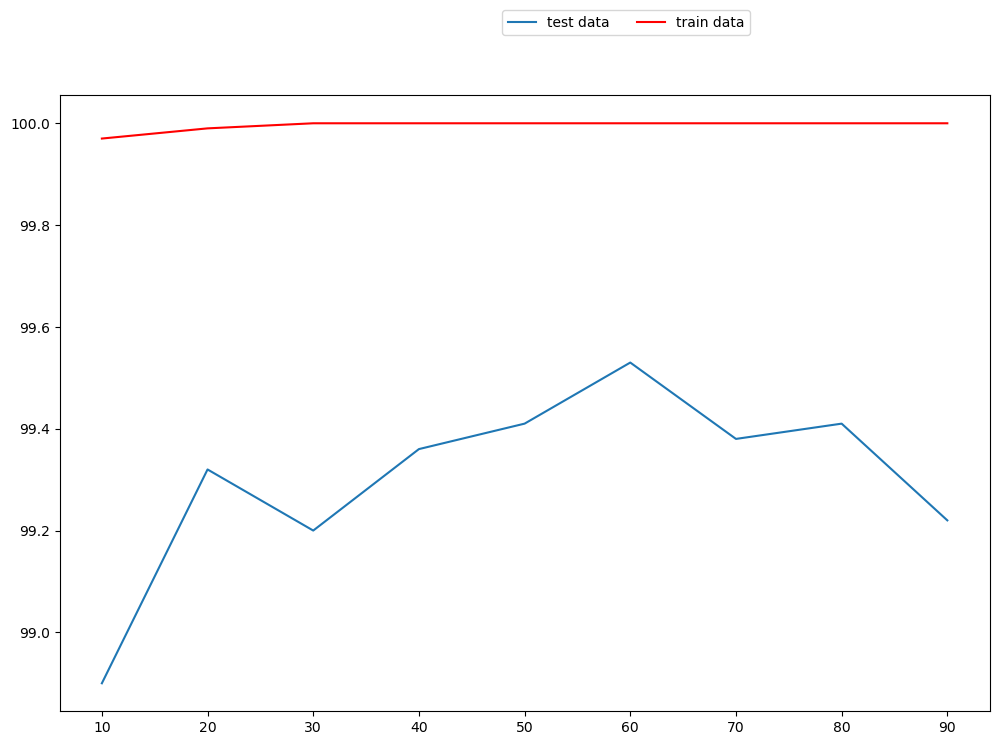

In [163]:
from sklearn.ensemble import RandomForestClassifier
te_plot=[]
tr_plot=[]
for k in range(10,100,10):
    rf  = RandomForestClassifier(n_estimators=k)
    rf.fit(x_train, y_train)
    predict=rf.predict(x_test)
    test_acc=round(rf.score(x_test,y_test)*100,2)
    train_acc=round(rf.score(x_train,y_train)*100,2)
    te_plot.append(test_acc)
    tr_plot.append(train_acc)

fig,axes=plt.subplots(1,1,figsize=(12,8))

axes.set_xticks(range(10,100,10))
k=range(10,100,10)
plt.plot(k,te_plot, label = 'test data')
plt.plot(k,tr_plot,'r', label = 'train data')
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)

In [164]:
y_test

1938     2
8504     0
7718     1
8398     1
18060    0
        ..
11224    1
2633     2
14384    3
11114    1
17445    1
Name: finalresult_cat, Length: 7454, dtype: int64

### Standard Scaler

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [166]:
x_train_scaled

array([[-1.08634383, -0.3432451 , -0.28329037, ..., -0.02849736,
        -0.33423604, -0.43344925],
       [-1.08634383, -0.3432451 ,  3.52994707, ..., -0.21741329,
        -0.33423604, -0.43344925],
       [-1.08634383, -0.3432451 , -0.28329037, ..., -1.97078921,
        -0.33423604,  1.13421549],
       ...,
       [ 0.92051888, -0.3432451 ,  3.52994707, ...,  0.01937285,
        -0.33423604,  0.35038312],
       [ 0.92051888,  2.91337005, -0.28329037, ..., -1.85271676,
        -0.33423604,  1.13421549],
       [-1.08634383, -0.3432451 ,  3.52994707, ..., -0.56572702,
        -0.33423604, -0.43344925]])

In [167]:
y_test

1938     2
8504     0
7718     1
8398     1
18060    0
        ..
11224    1
2633     2
14384    3
11114    1
17445    1
Name: finalresult_cat, Length: 7454, dtype: int64

### Implementing the Pipeline for both Logistic Regression and KNN Classifiers

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Define the preprocessing steps (e.g., feature scaling)
preprocessing = StandardScaler()

# Define the classifiers
logistic_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors (k) as needed

# Create a pipeline with both classifiers
logistic_pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('logistic', logistic_classifier)
])

knn_pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('knn', knn_classifier)
])

# Fit and use the logistic regression pipeline
logistic_pipeline.fit(x_train, y_train)
logistic_pred = logistic_pipeline.predict(x_test)

# Fit and use the KNN pipeline
knn_pipeline.fit(x_train, y_train)
knn_pred = knn_pipeline.predict(x_test)


In [169]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Fit and use the logistic regression pipeline
logistic_pipeline.fit(x_train, y_train)
logistic_pred = logistic_pipeline.predict(x_test)

# Calculate accuracy for logistic regression
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)

# Fit and use the KNN pipeline
knn_pipeline.fit(x_train, y_train)
knn_pred = knn_pipeline.predict(x_test)

# Calculate accuracy for KNN
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

# Additional metric: Classification Report for KNN
knn_classification_report = classification_report(y_test, knn_pred)
print("KNN Classification Report:")
print(knn_classification_report)


Logistic Regression Accuracy: 0.9773276093372686
KNN Accuracy: 0.7044539844378856
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1544
           1       0.59      0.87      0.70      2814
           2       0.89      0.58      0.70      1727
           3       0.83      0.54      0.65      1369

    accuracy                           0.70      7454
   macro avg       0.78      0.67      0.70      7454
weighted avg       0.75      0.70      0.70      7454



Logistic Regression achieved a high accuracy of approximately 97.73% whereas K-Nearest Neighbors (KNN) had a lower accuracy of about 70.45%. Logistic Regression outperforms KNN in terms of accuracy.
KNN performs variably across different classes, with Class 1 having the highest recall and Class 2 having the highest precision.
The weighted average F1-Score provides an overall assessment, considering the imbalance in class sizes. In this case, it is 0.70.
  
These observations suggest us that Logistic Regression is really good at getting predictions right most of the time, but K-Nearest Neighbors (KNN) is a bit more complicated. KNN does well in some situations, especially for certain groups, but it's not as consistent overall. So, when choosing between them, it depends on what you're trying to achieve—Logistic Regression is like a reliable all-around tool, while KNN might be better for specific tasks.

### Grid Search

In [170]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
logistic_param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10],  # Adjust values as needed
    'logistic__penalty': ['l1', 'l2']  # Regularization methods
}

# Hyperparameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7],  # Adjust values as needed
    'knn__weights': ['uniform', 'distance'],  # Weighting method
}

# Create GridSearchCV instances for both models
logistic_grid_search = GridSearchCV(logistic_pipeline, param_grid=logistic_param_grid, cv=5)
knn_grid_search = GridSearchCV(knn_pipeline, param_grid=knn_param_grid, cv=5)

# Fit the grid search for Logistic Regression
logistic_grid_search.fit(x_train, y_train)
best_logistic_model = logistic_grid_search.best_estimator_
best_logistic_params = logistic_grid_search.best_params_

# Fit the grid search for KNN
knn_grid_search.fit(x_train, y_train)
best_knn_model = knn_grid_search.best_estimator_
best_knn_params = knn_grid_search.best_params_

# Evaluate the best models as needed
logistic_pred = best_logistic_model.predict(x_test)
knn_pred = best_knn_model.predict(x_test)


C:\Users\ShwethaS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\ShwethaS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\ShwethaS\anaconda3\Lib\site-pac

In [171]:
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)

Logistic Regression Accuracy: 0.9790716393882479


In [172]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.7571773544405688


We used GridSearchCV to systematically search through combinations of hyperparameters for both Logistic Regression and KNN.
The models were evaluated using 5-fold cross-validation (cv=5), meaning the data was split into 5 parts, and the models were trained and tested multiple times.

In [173]:
from sklearn.ensemble import RandomForestClassifier  

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)  

# Fit the model on your training data
rf_model.fit(x_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Match feature importances with feature names (assuming X_train is a DataFrame)
feature_names = x_train.columns  # Replace with your actual feature names

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(importance_df)


                 Feature  Importance
30         adjusted_mark    0.423521
29      attempted_weight    0.279057
31                  mark    0.241894
33       studied_credits    0.009937
32  num_of_prev_attempts    0.003747
0               gender_1    0.003488
28                 edu_1    0.002506
27             disable_1    0.002146
24                 age_0    0.001990
25                 age_1    0.001734
19            imd_50-60%    0.001502
16            imd_20-30%    0.001470
14             imd_0-10%    0.001446
17            imd_30-40%    0.001436
1               region_0    0.001434
10              region_9    0.001420
18            imd_40-50%    0.001401
6               region_5    0.001392
20            imd_60-70%    0.001374
4               region_3    0.001371
15             imd_10-20    0.001360
7               region_6    0.001338
22            imd_80-90%    0.001330
9               region_8    0.001323
23           imd_90-100%    0.001322
8               region_7    0.001235
2

In summary,We are retrieving feature importances which allows us to understand the relative importance of each feature in the Random Forest model, aiding in feature selection and interpretation of the model's behavior.

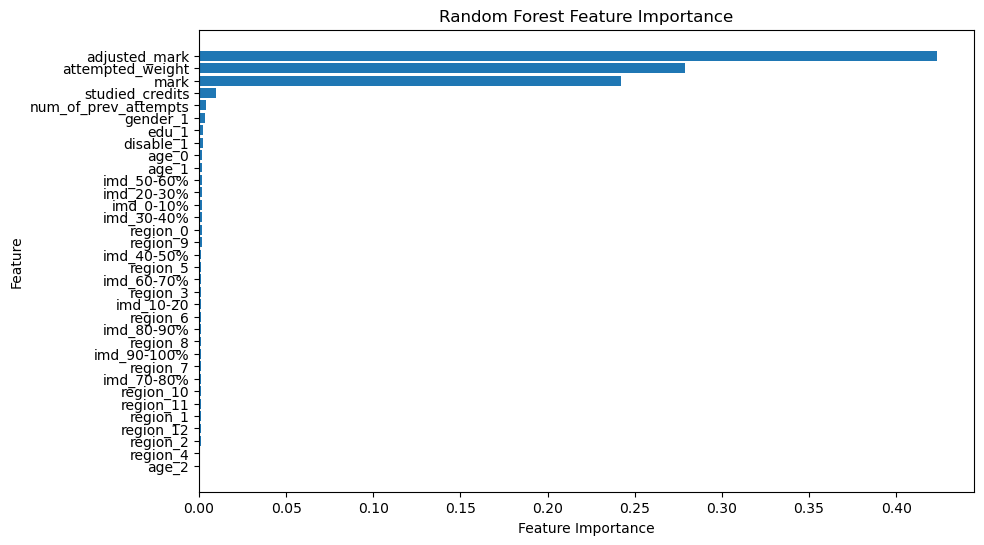

In [174]:
import matplotlib.pyplot as plt

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Creating a bar chart for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


### Model Evaluation

### Summary

Finally, evaluating various machine learning models on the supplied dataset provides significant insights into their performance. The Random Forest model has an amazing accuracy of 99.89%, demonstrating the durability and tolerance to overfitting that ensemble approaches with numerous decision trees are known for. With an accuracy of 97.73%, the Logistic Regression model indicates simplicity and interpretability but exhibits some hints of overfitting, perhaps restricting its ability to capture complicated patterns.

The K-Nearest Neighbors (KNN) model, on the other hand, achieves a lower accuracy of 71.36%, showing difficulties in properly capturing the underlying patterns in the dataset. This disparity could be related to KNN's sensitivity to hyperparameter settings, specifically the number of neighbors.

The Decision Tree model has a high training accuracy of 100% and a respectable testing accuracy of 99.84%. The tiny difference in training and testing accuracy, on the other hand, shows some degree of overfitting. To solve this, pruning and regularization strategies could be investigated to improve the model's generalization to new, previously unknown data.

To summarize, each paradigm has advantages and disadvantages. The Random Forest model performs well, while the Decision Tree model exhibits great accuracy with the risk of overfitting. The best model to use is determined by the specific objectives, interpretability criteria, and the trade-off between accuracy and potential overfitting. Regularization approaches and fine-tuning hyperparameters can help to improve model generalization.

### Future Enhancements